<a href="https://colab.research.google.com/github/nvancha/DS_Hackathon-/blob/main/GROUP_17_WOW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GROUP - 17 WOW PROJECT
By: Amina Seini & Nipuna Vancha


#**Executive Summary (B.L.U.F)**

We selected [Graduate Admission dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) as the preferred dataset and completed an EDA for this.

###Business Problem:
Predicting what aspect of Graduate Admission should International Students focus efforts on
###Metrics:
Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R-squared (R2) etc...
###Data:
Dataset describes probability of admission for Indian students dependent on certain factors (TOEFL, Letter of recommendation  etc),
###KPIs:
Accuracy
Precision
Feature Importance
ROC Curve etc…
###Final Recommendations:
CGPA is the most critical factor for graduate admissions followed by GRE Score. These are the 2 areas prospective students should focus efforts on in the future.


#**Business Problem**
Students are often worried about their chances of graduate admission. For international students, even more ambiguity; not living in the US makes them feel left in the dark.

Our chosen dataset describes probability of admission for Indian students dependent on certain factors.

This WOW project aims to understand which of the given variables will be most useful in predicting if a given student will be admitted.

By identifying this, we are hoping our predicted output gives a fair idea about what aspect of applications most affects admission. This will assist prospective students to know which areas to correct in the future.


#**Data Dictionary**
1. GRE Scores ( out of 340 )

2. TOEFL Scores ( out of 120 )

3. University Rating ( out of 5 )

4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

5. Undergraduate GPA ( out of 10 )

6. Research Experience ( either 0 or 1 )

7. Chance of Admit ( ranging from 0 to 1 )

#**Exploratory Data Analysis**
Lets load the dataset and take a look at it


In [ ]:
import pandas as pd

# Use the direct download link for the Google Drive file
#https://drive.google.com/file/d/1NC3ALQL8u2yJvbuQ2Dh8vMsGTpidxQC7/view?usp=sharing
url = 'https://drive.google.com/uc?id=1NC3ALQL8u2yJvbuQ2Dh8vMsGTpidxQC7'

# Read in the dataset
df = pd.read_csv(url)

# Display the DataFrame
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [ ]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
# Feature Types
quant_features = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
target = ['Chance of Admit']


In [ ]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
# get unique values of the target ('Credit_Score')
for feature in ['Chance of Admit ']:
  unique_values = df[feature].unique()
  print(feature,unique_values)

Chance of Admit  [0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.63 0.64 0.7  0.94 0.95 0.97 0.44 0.46 0.74 0.91 0.88
 0.58 0.48 0.49 0.53 0.87 0.86 0.89 0.82 0.56 0.36 0.42 0.47 0.55 0.57
 0.96 0.93 0.38 0.34 0.79 0.71 0.69 0.59 0.85 0.77 0.81 0.83 0.67 0.73
 0.6  0.43 0.51 0.39 0.37]


In [ ]:
# count NaNs
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Identify duplicates (dups)
df.duplicated().sum()

0

In [ ]:
# summary
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

In [ ]:
!pip install autoviz
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
# create an AutoViz class
AV = AutoViz_Class()
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of your Data Set loaded: (500, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    8 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Serial No.']

################ Regression problem #####################


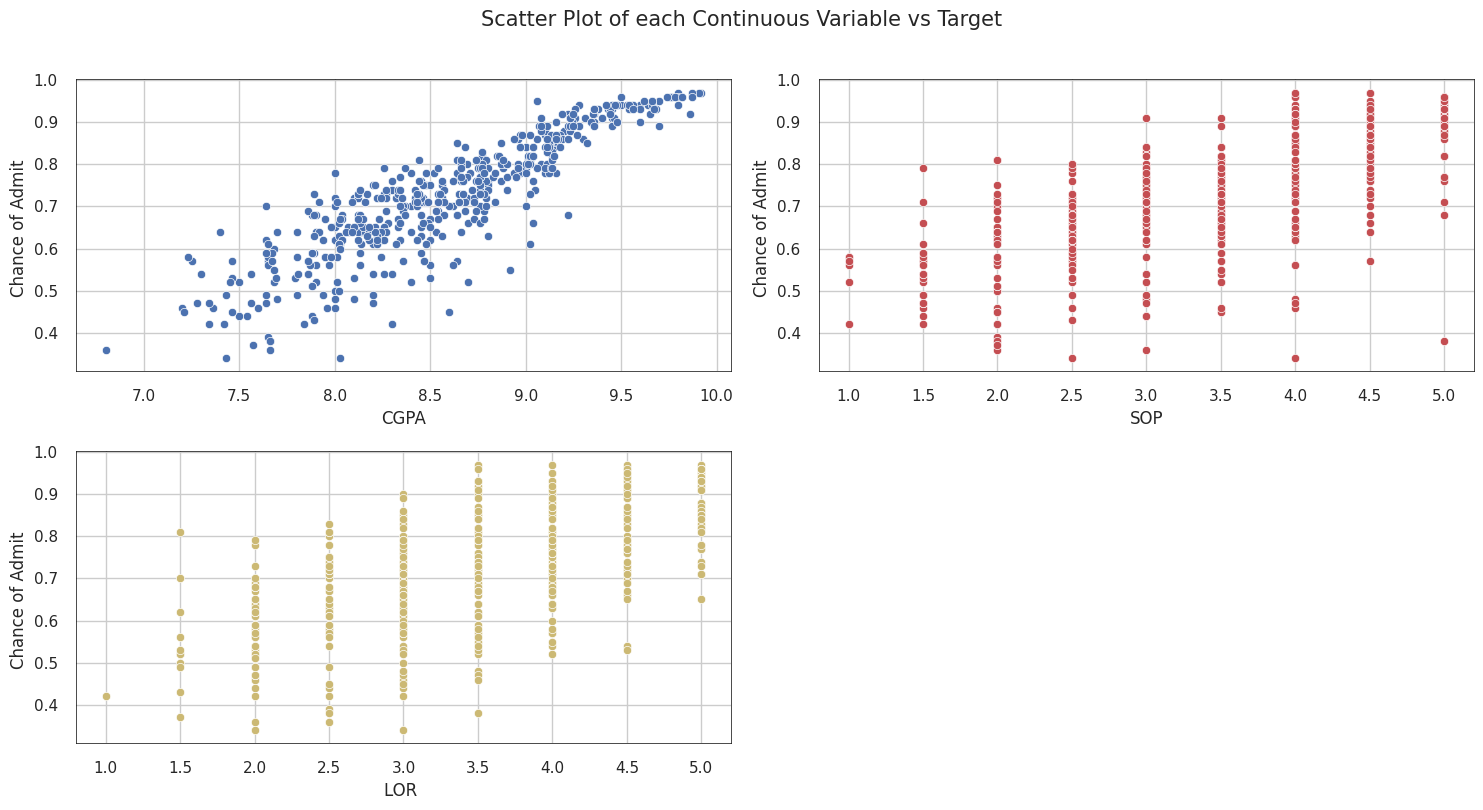

Number of All Scatter Plots = 6


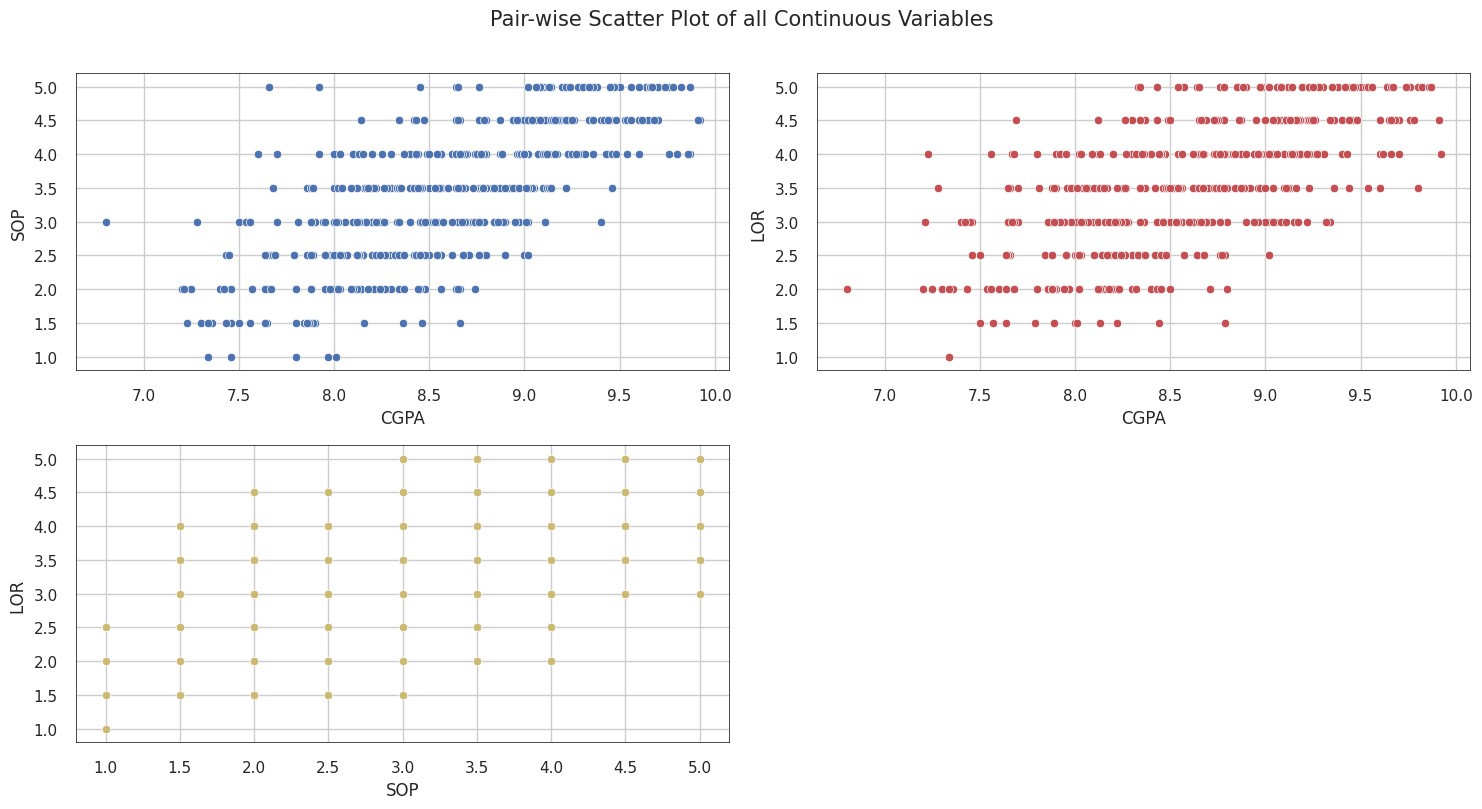

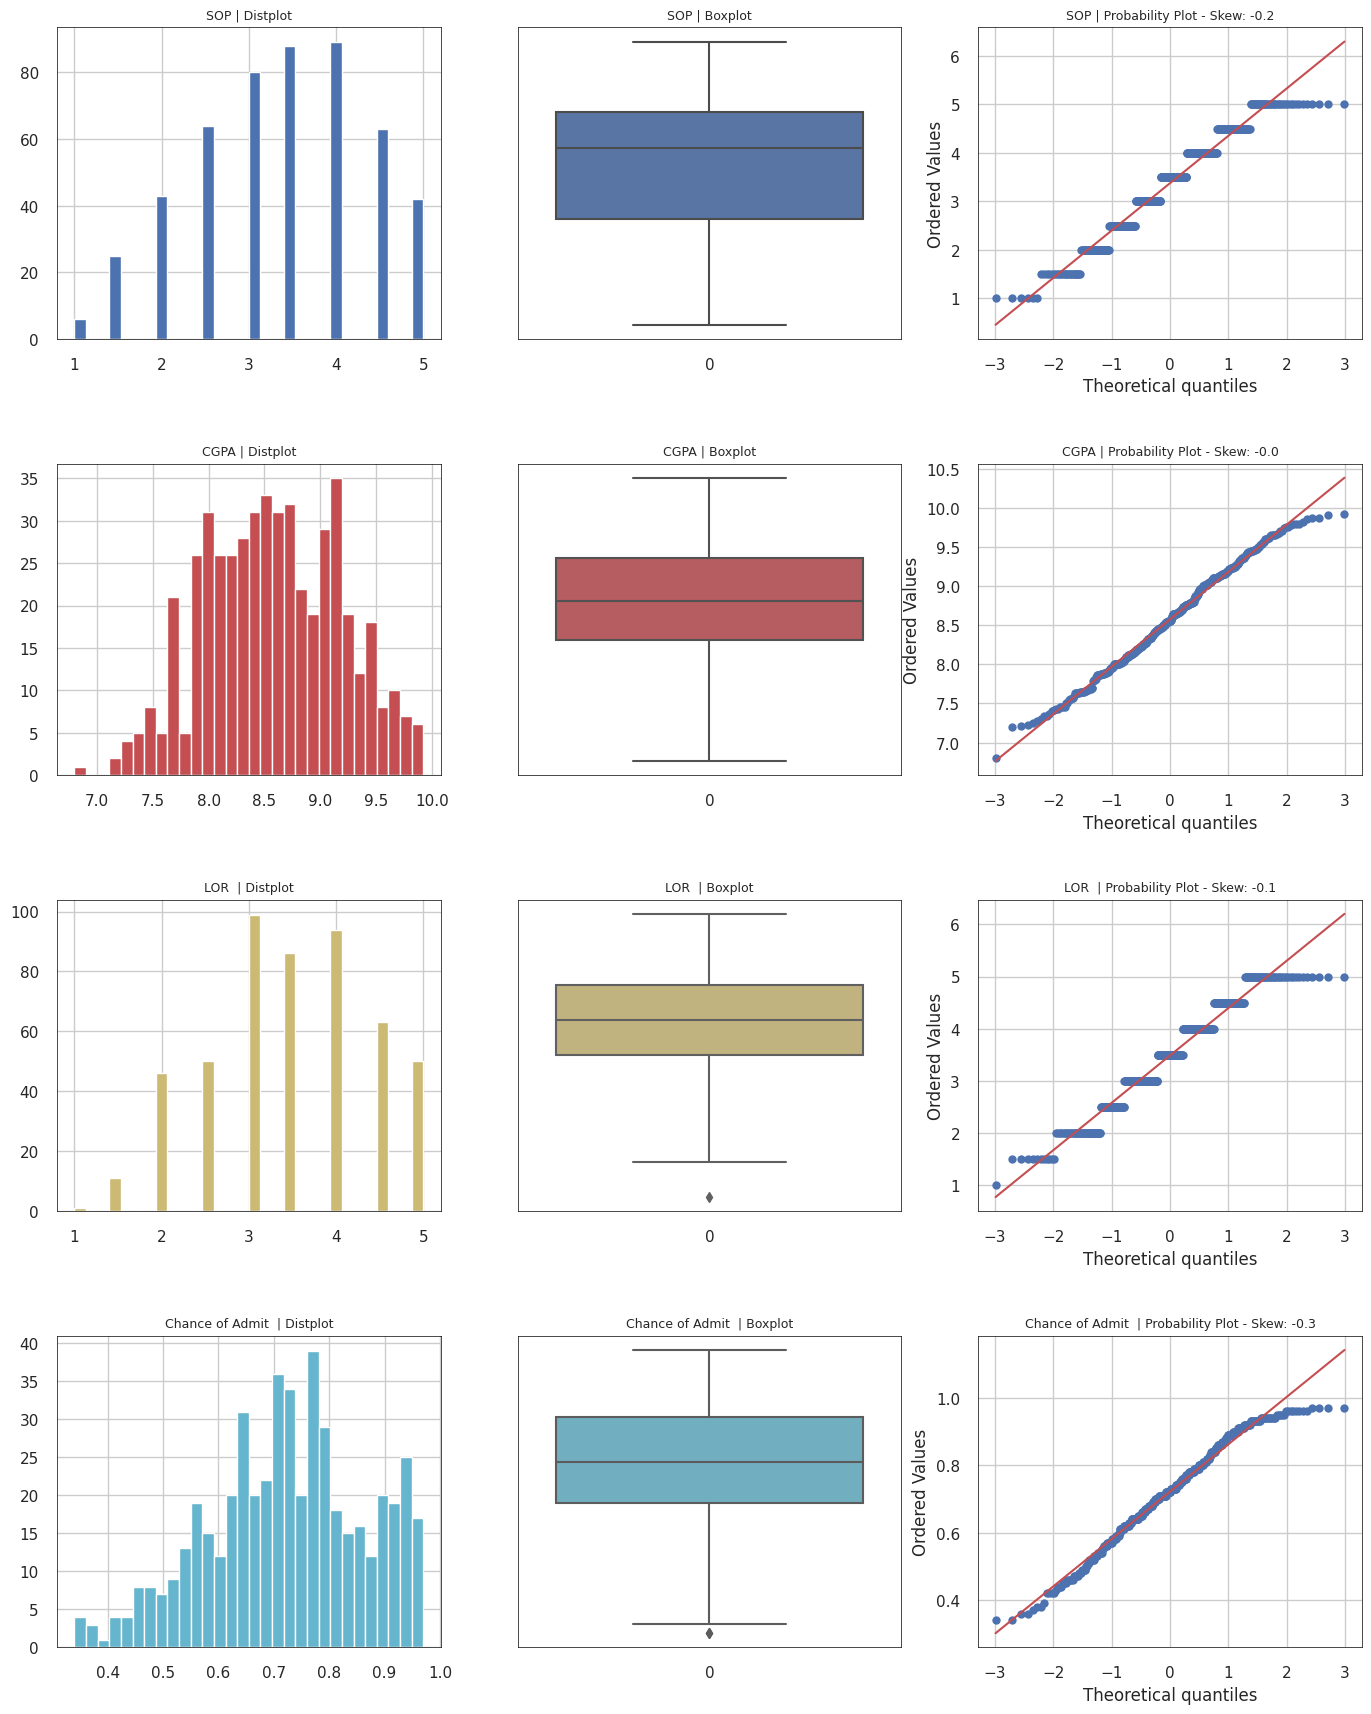

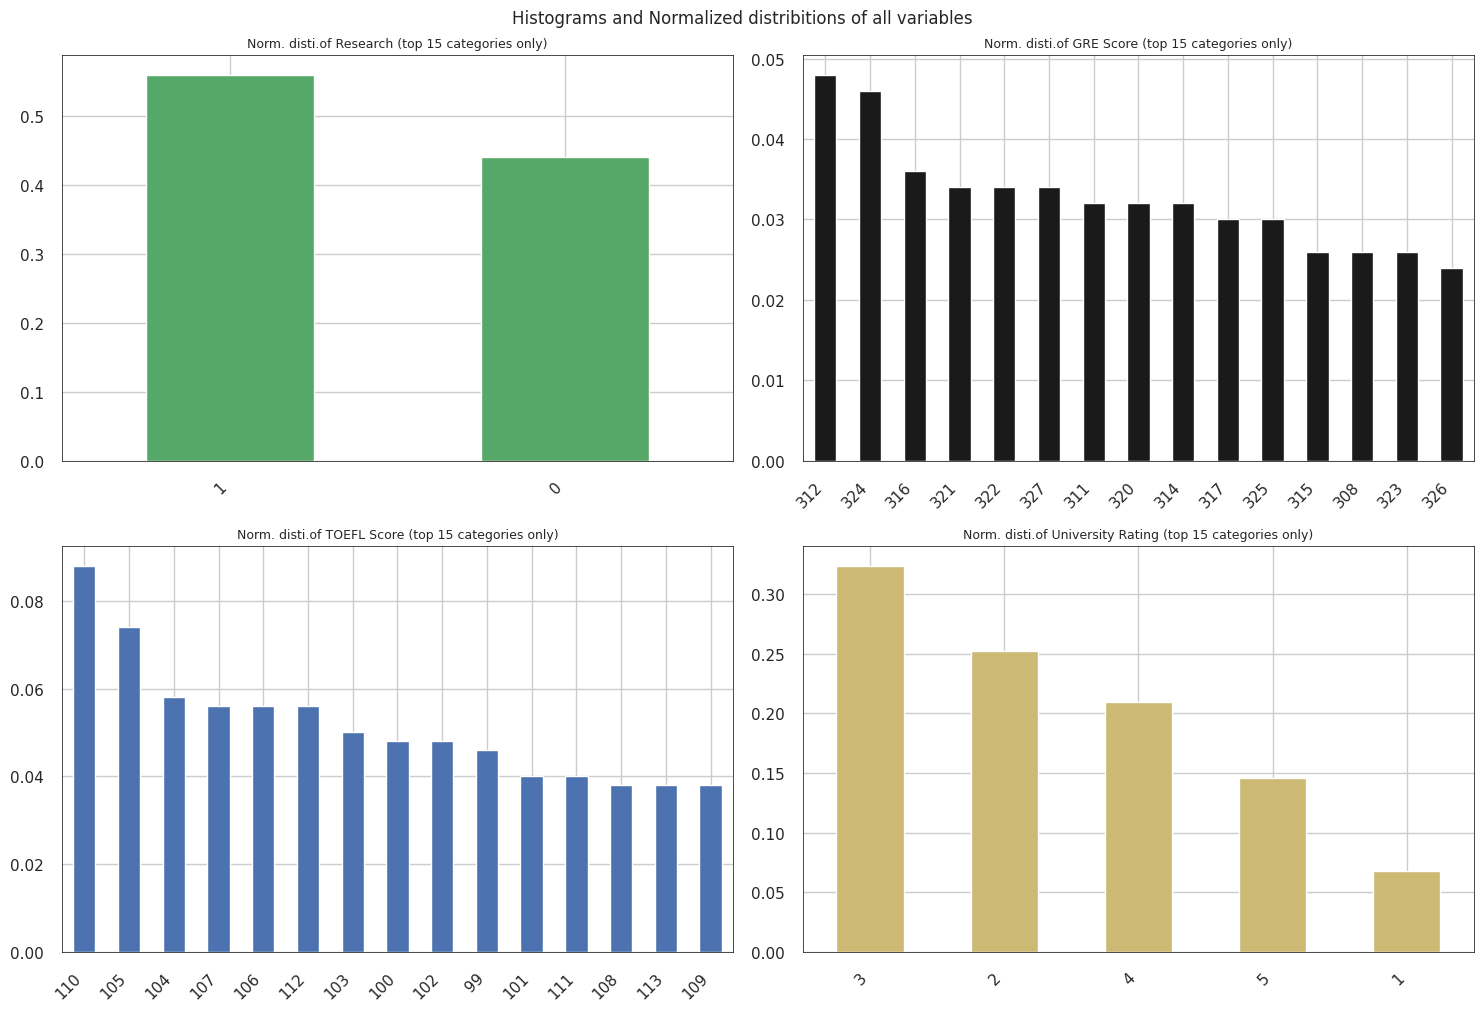

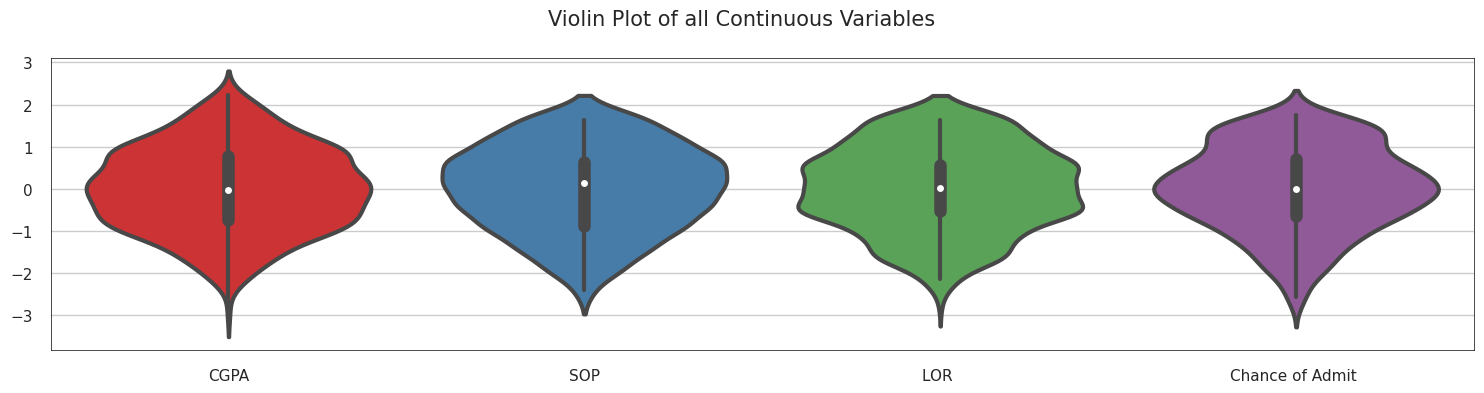

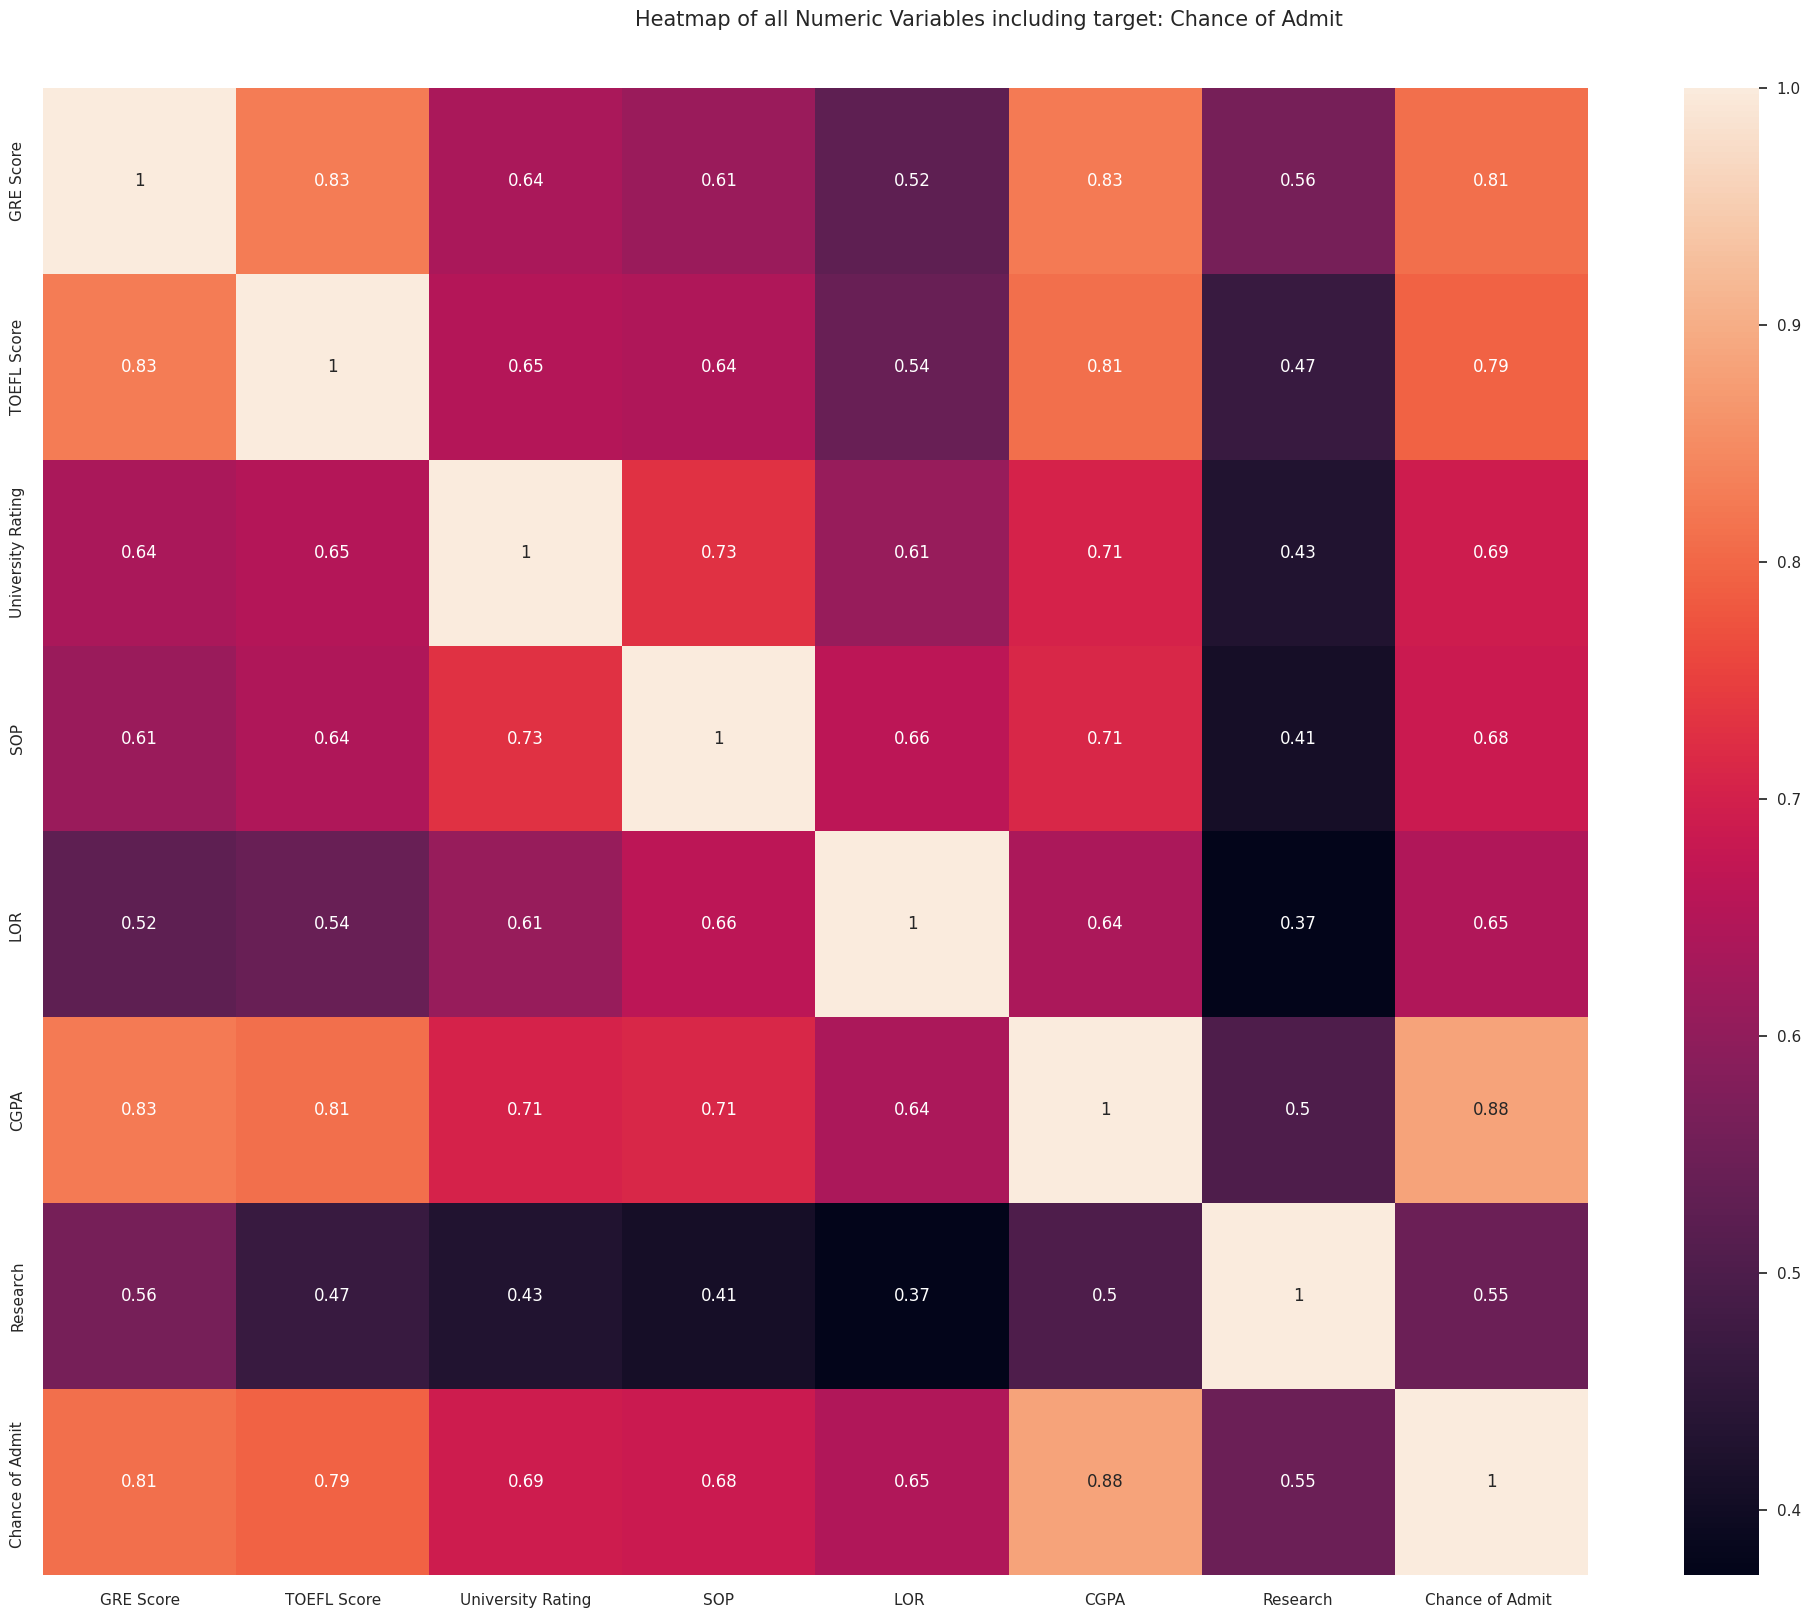

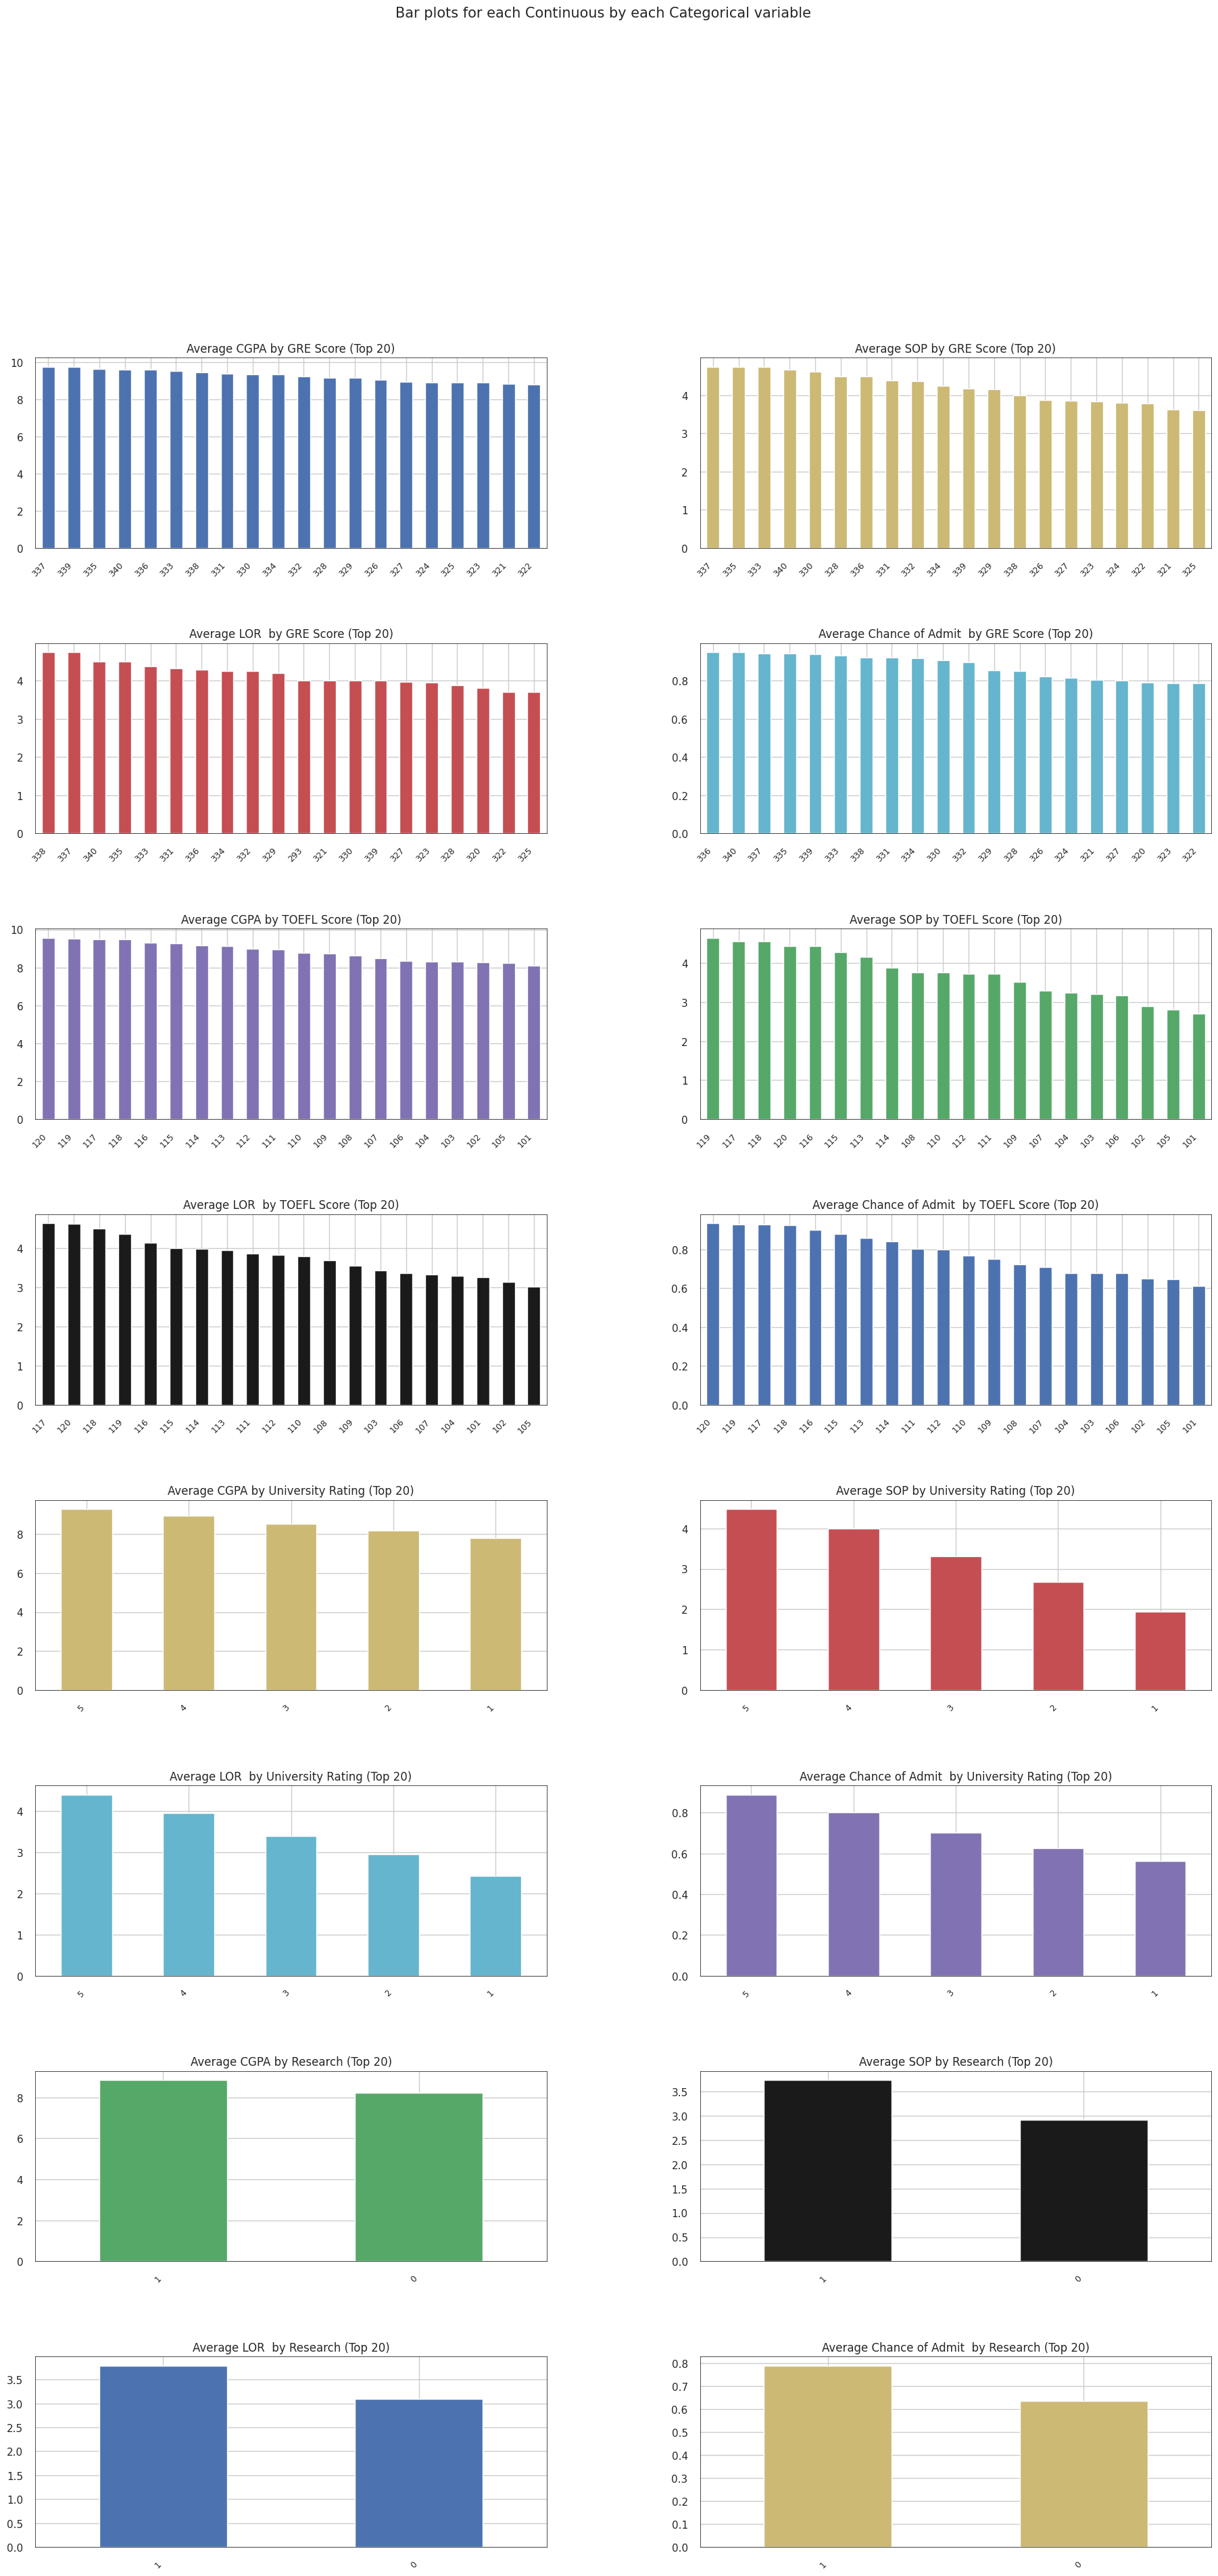

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Create charts
dftc = AV.AutoViz(
    filename='',
    sep='',
    depVar='Chance of Admit ',
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='png',
    max_rows_analyzed=2000,
    max_cols_analyzed=30
)

#**Data Preprocessing**


Next let's check out the distribution of the variables of graduate applicants.

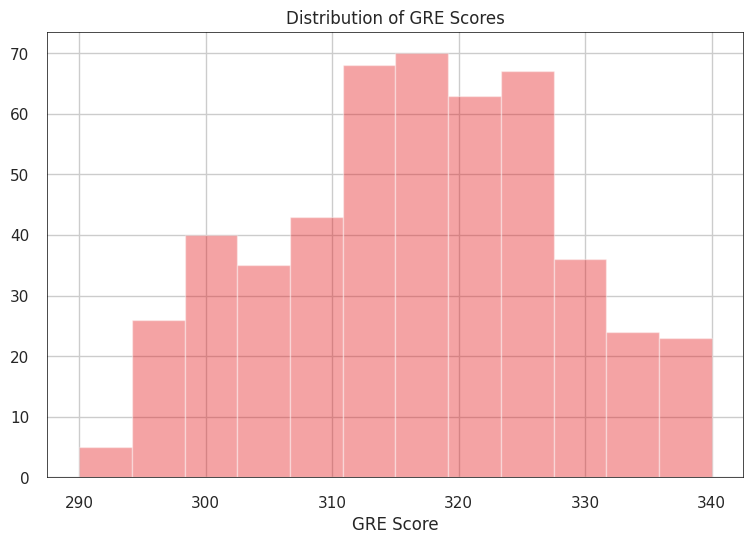

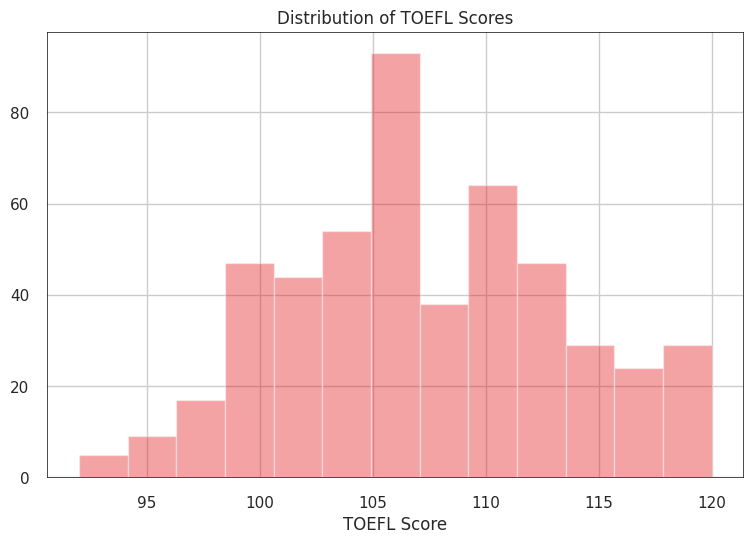

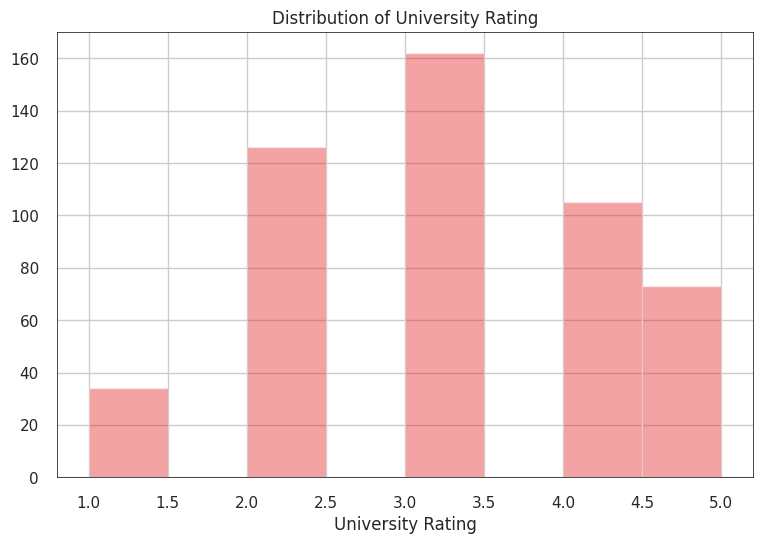

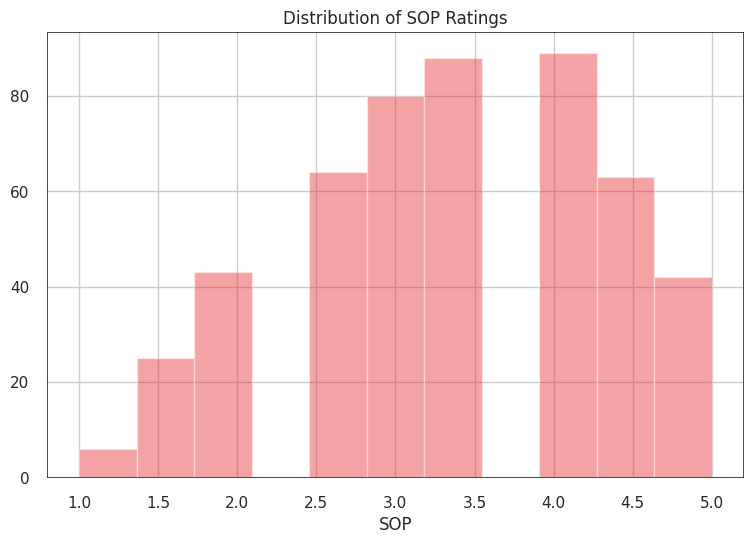

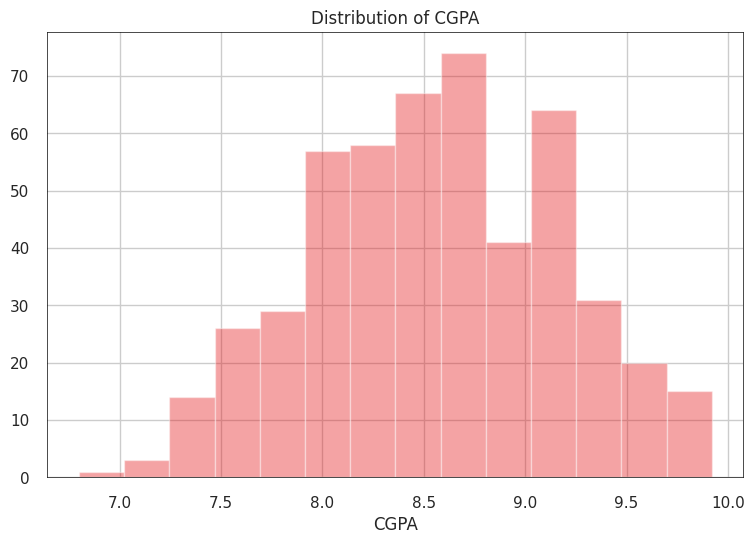

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

From the distributions, students with varied merit apply for the university.


*Let's continue understanding the relation between different factors responsible for graduate admissions*

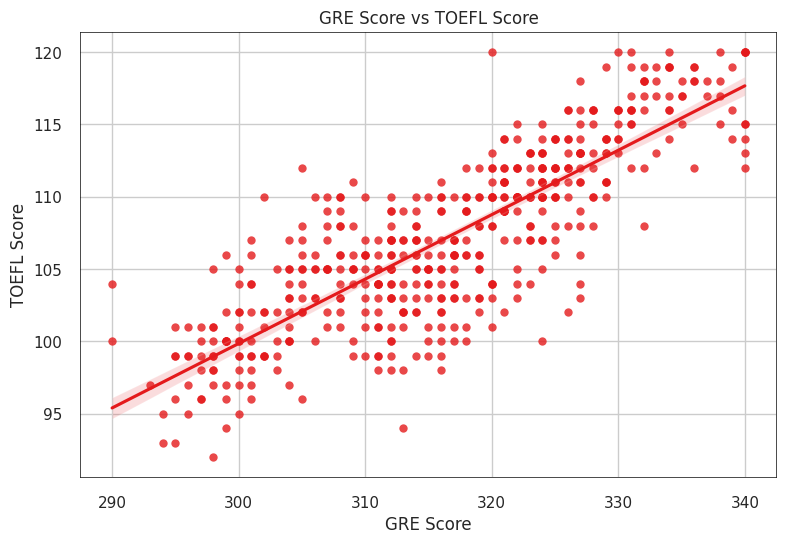

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

It seems people with higher GRE Scores also have higher TOEFL Scores which is makes sense because both TOEFL and GRE have a verbal section which although not similar are similar

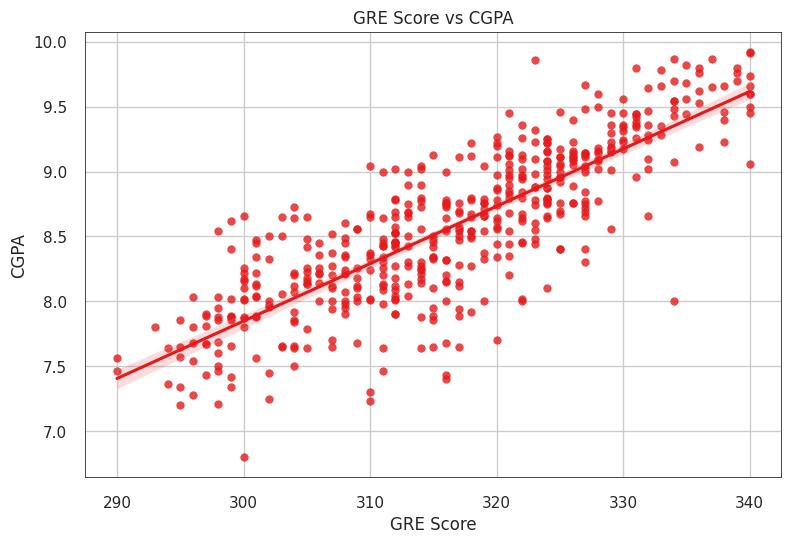

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Depite the exceptions, people with higher CGPA usually have higher GRE scores. This also makes sense because they tend to be smart and/or hard working

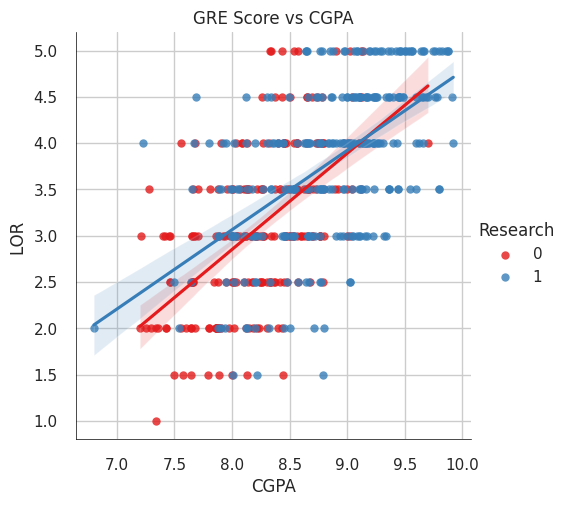

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not significantly related with CGPA so suggests that a persons LOR is not dependent on that persons academic excellence. Research is fairlly related to a good LOR which could be explained by research supervisors having personal interaction with the students and give them good LORs

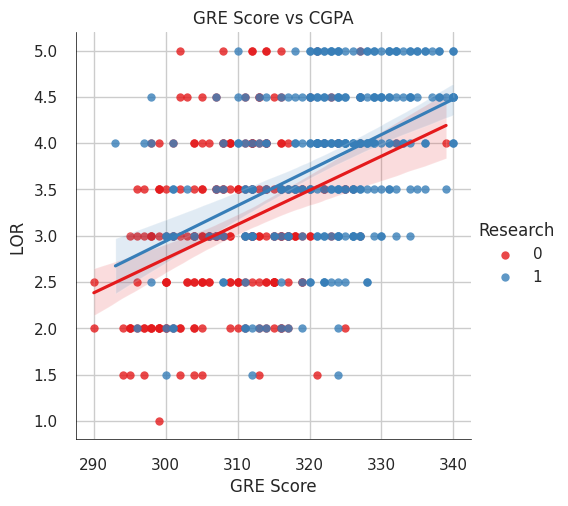

In [ ]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not significantly related.

People with  different LOR strength have varied GRE scores

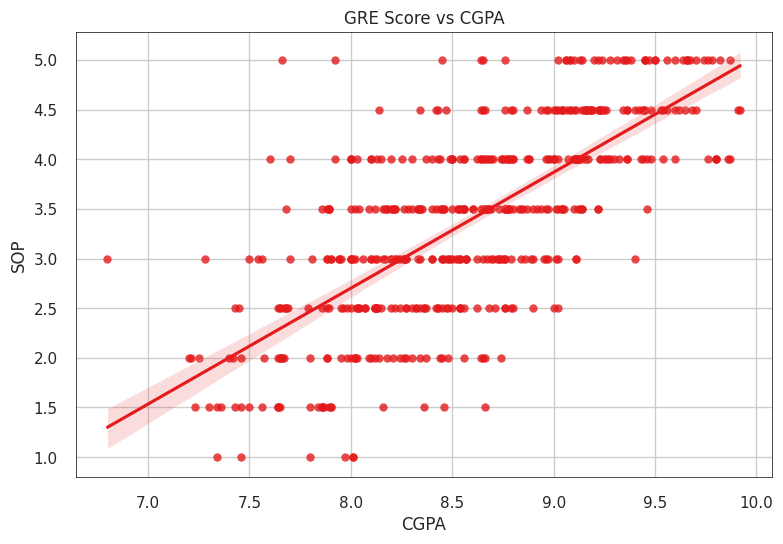

In [ ]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are fairly related; not significantly


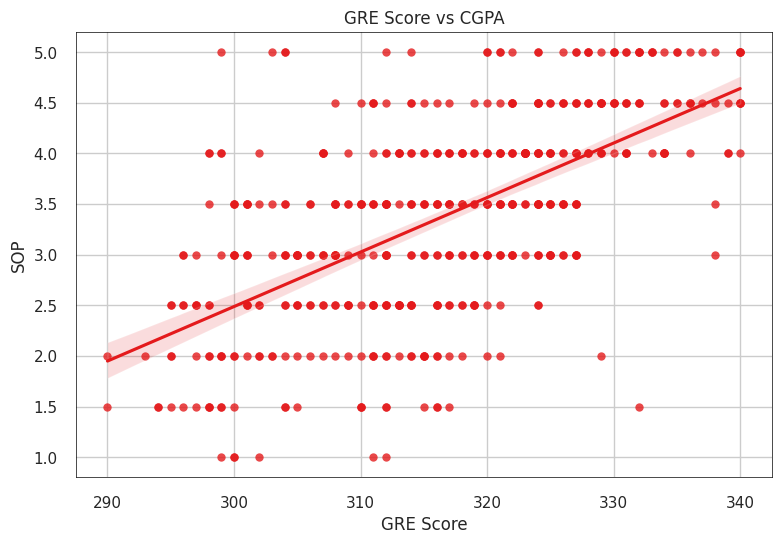

In [ ]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related



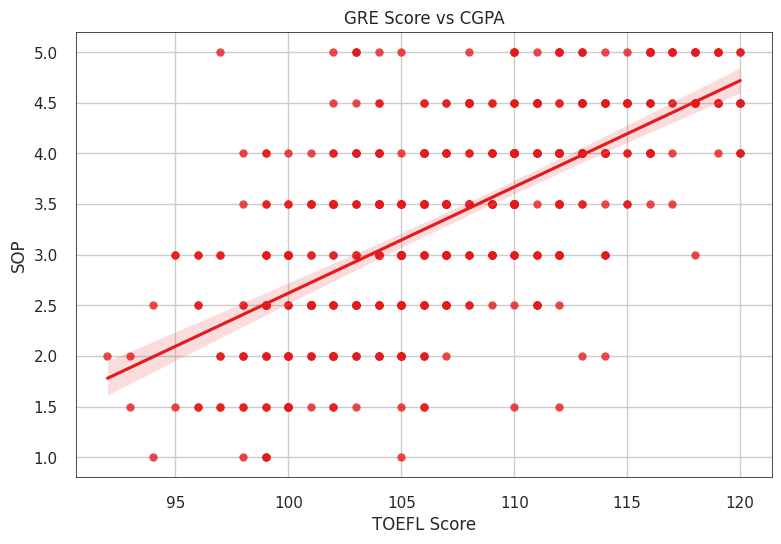

In [ ]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with various of SOP have various TOEFL Score. So the quality of SOP is not significantly related to the applicants English skills.
#**Skewness and Correction**

In [ ]:
# Calculate skewness of each column
skewness = df.skew()

# Print skewness values
print(skewness)


Serial No.           0.000000
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64


Variables like 'University Rating', 'TOEFL Score', and 'Research' are positively skewed, while the rest are negatively skewed.



In [ ]:
import numpy as np
from scipy.stats import yeojohnson

# Create a copy of the DataFrame to store transformed data
transformed_df = df.copy()

# List of columns to apply transformation
cols_to_transform = [
    'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '
]

# Apply the Yeo-Johnson transformation to each column
for col in cols_to_transform:
    transformed_data, _ = yeojohnson(df[col])
    transformed_df[col] = transformed_data

# Calculate the skewness of the transformed data
transformed_skewness = transformed_df.skew()

# Print the skewness values of the transformed data
print(transformed_skewness)


Serial No.           0.000000
GRE Score           -0.012026
TOEFL Score         -0.001730
University Rating   -0.053493
SOP                 -0.090262
LOR                 -0.069806
CGPA                -0.013165
Research            -0.242475
Chance of Admit     -0.044059
dtype: float64


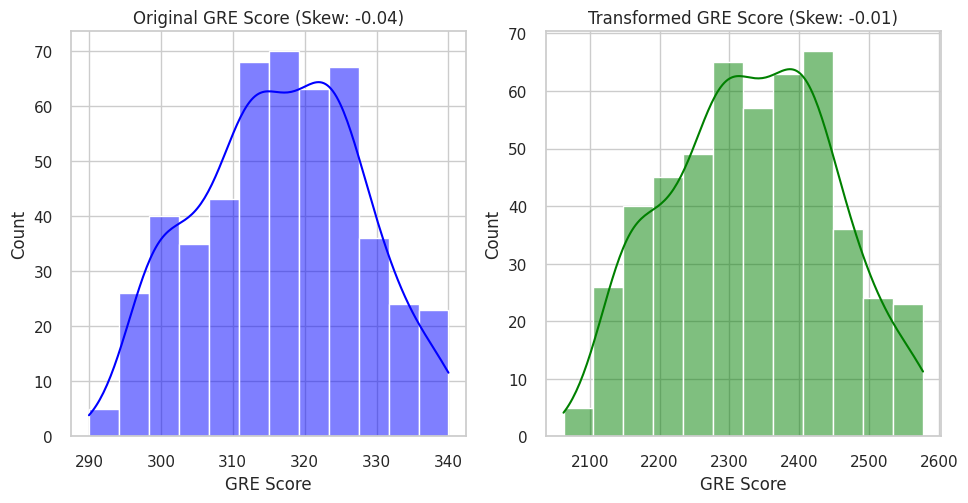

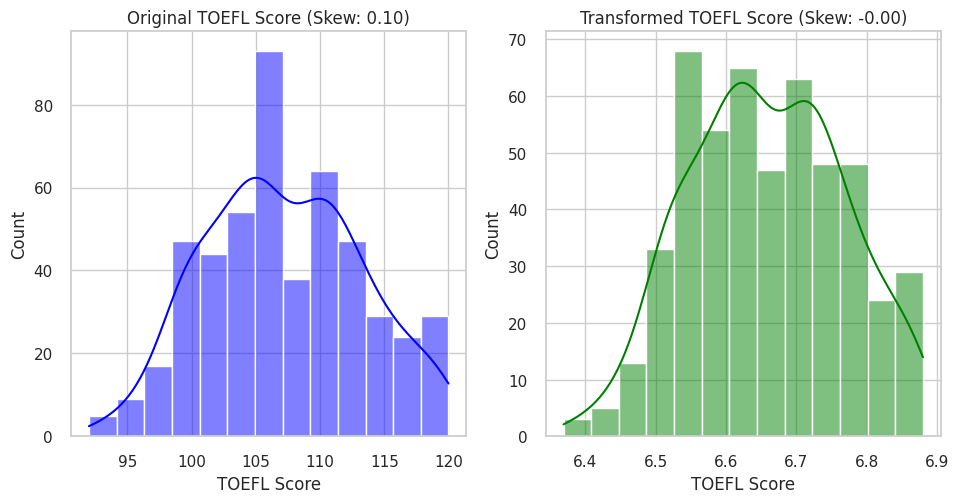

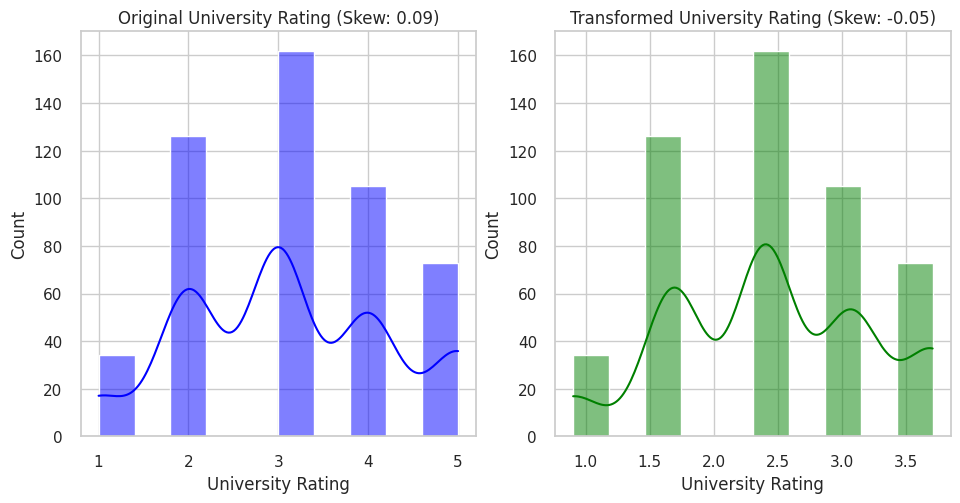

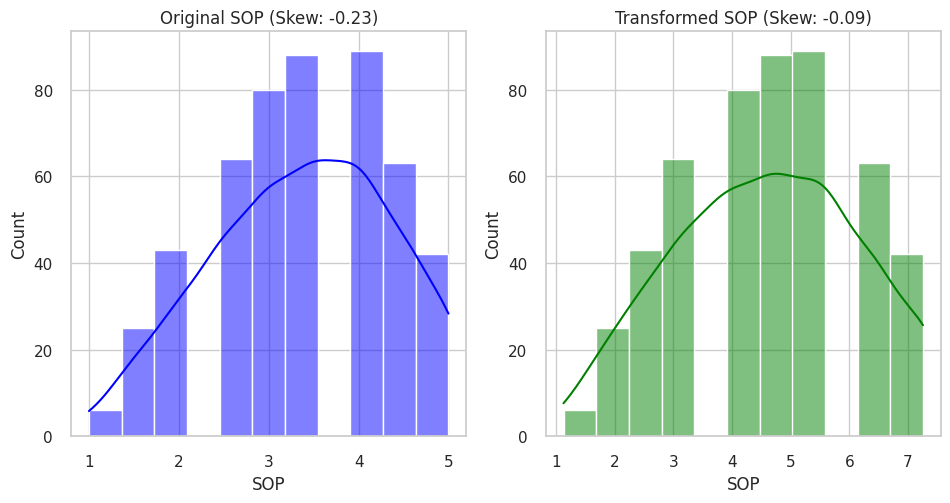

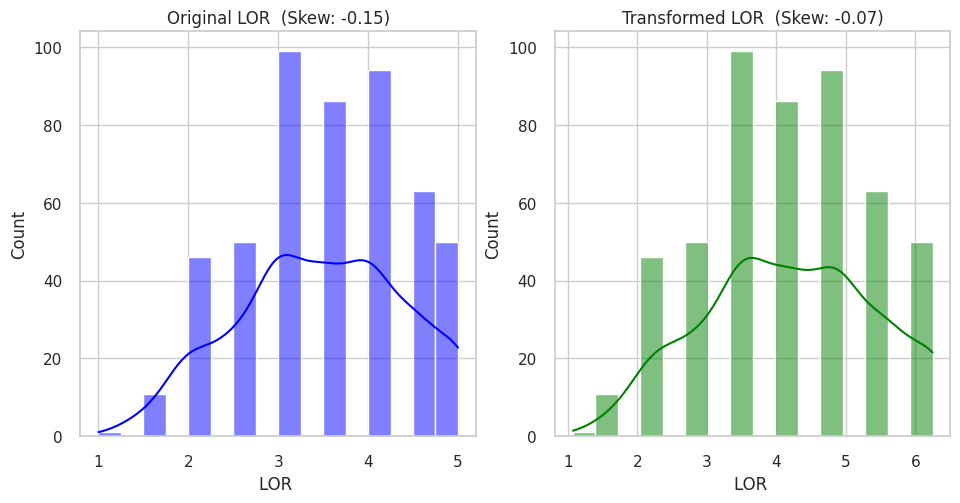

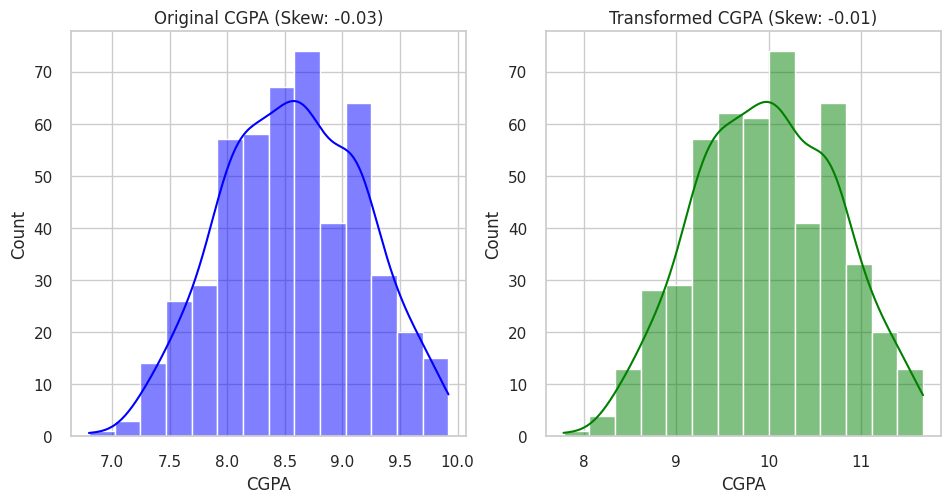

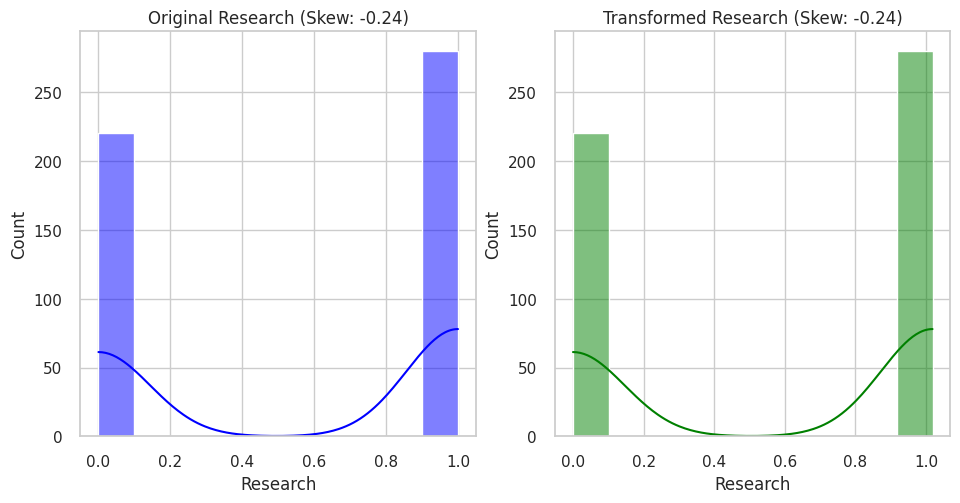

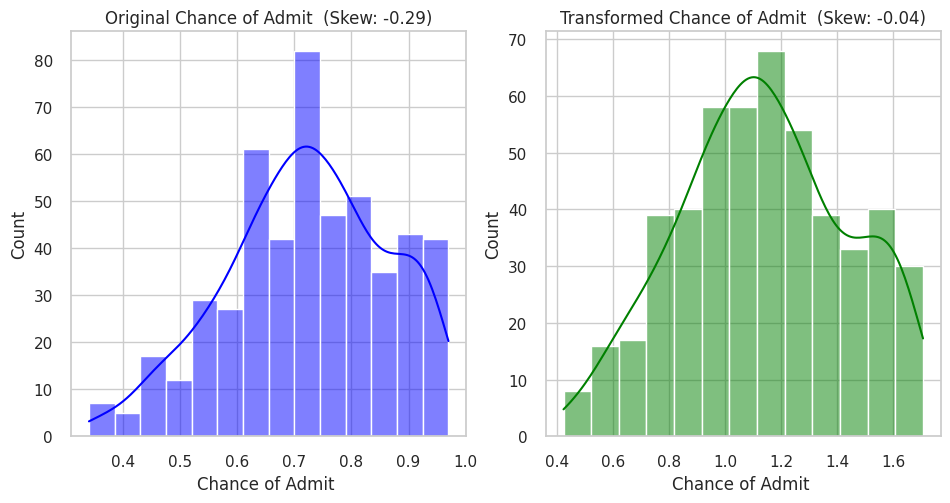

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the histograms for the original data
for col in cols_to_transform:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Original {col} (Skew: {df[col].skew():.2f})')

    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[col], kde=True, color='green')
    plt.title(f'Transformed {col} (Skew: {transformed_df[col].skew():.2f})')

    plt.show()


#**Outliers**

In [ ]:
# Function to find outliers using the IQR method
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find and print outliers for each column in the transformed DataFrame
for col in cols_to_transform:
    outliers = find_outliers(transformed_df, col)
    print(f'Outliers for {col}:')
    print(outliers)
    print()

Outliers for GRE Score:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []

Outliers for TOEFL Score:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []

Outliers for University Rating:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []

Outliers for SOP:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []

Outliers for LOR :
     Serial No.    GRE Score  TOEFL Score  University Rating       SOP  \
347         348  2152.571527     6.409516           0.903394  1.131197   

         LOR       CGPA  Research  Chance of Admit   
347  1.076821  8.444232       0.0          0.550153  

Outliers for CGPA:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL S

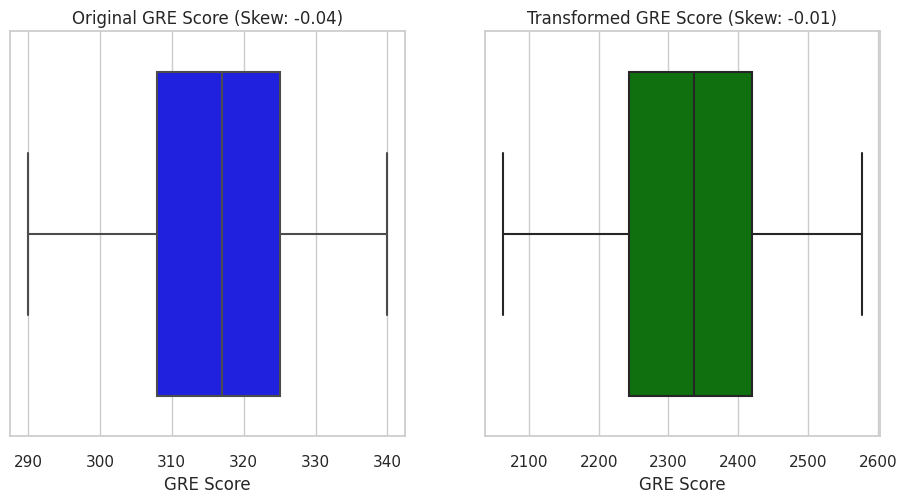

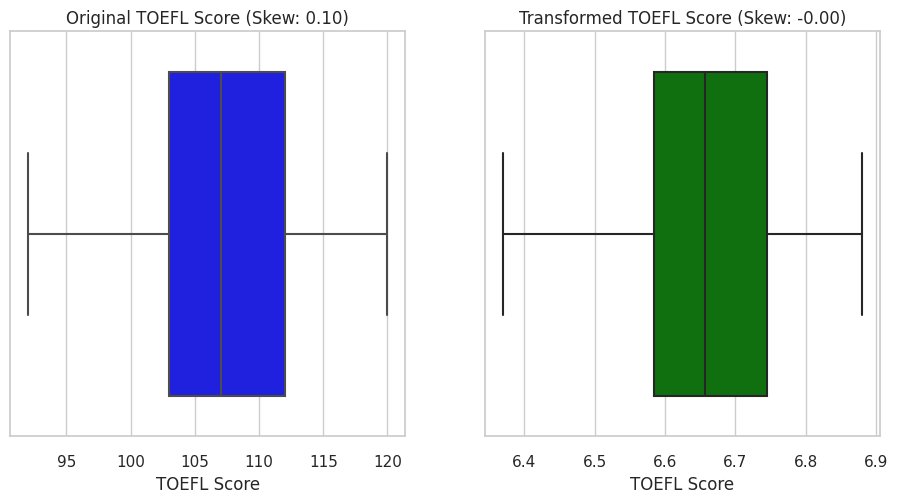

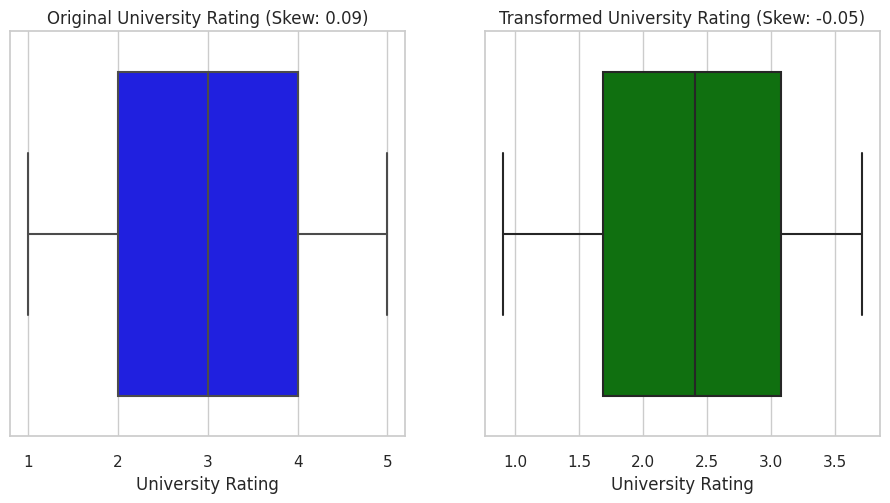

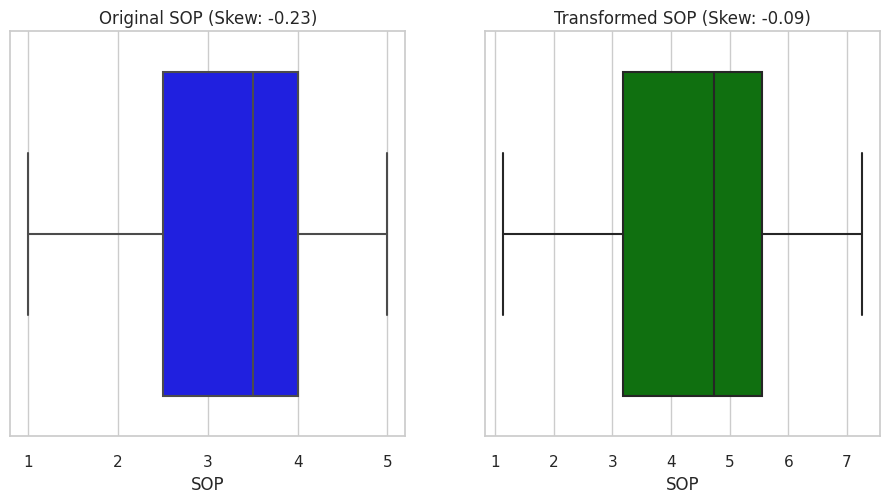

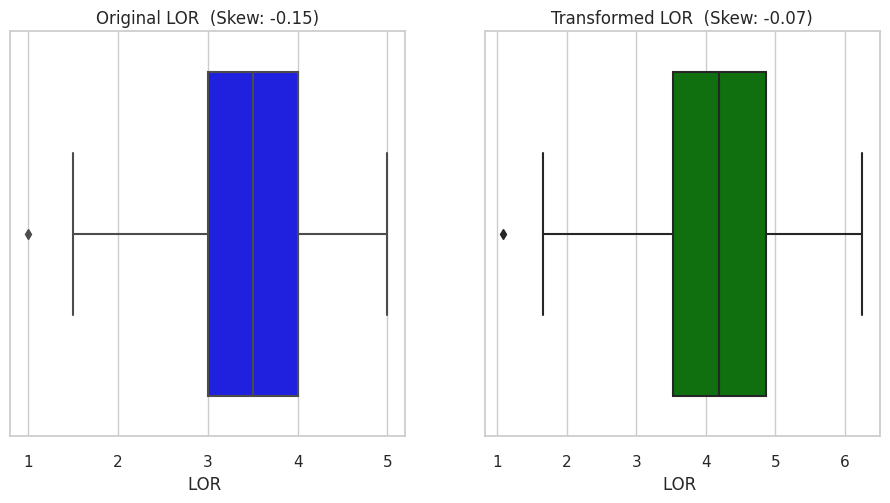

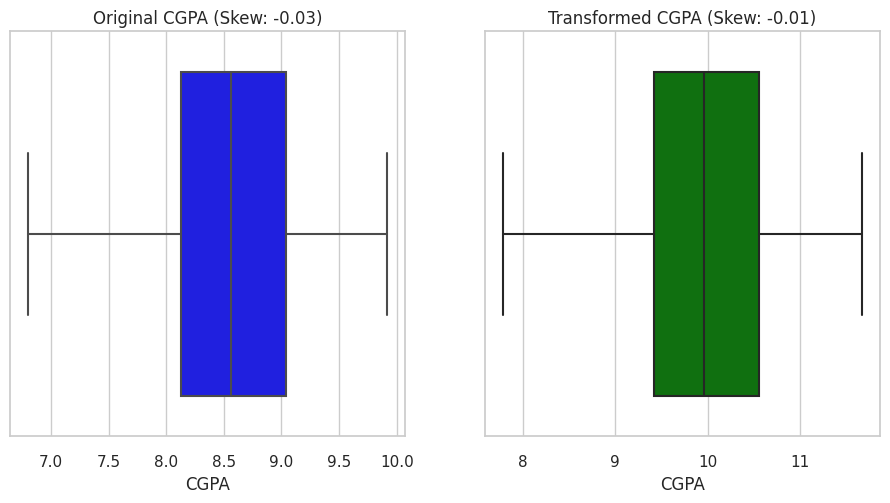

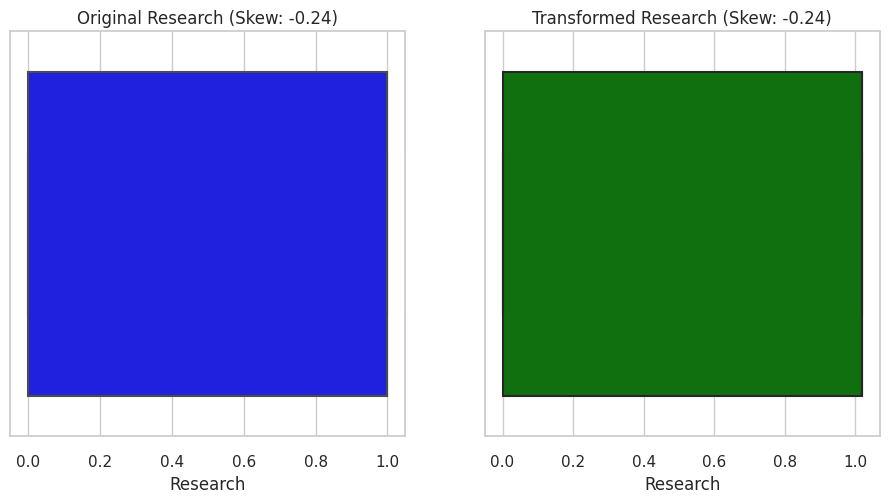

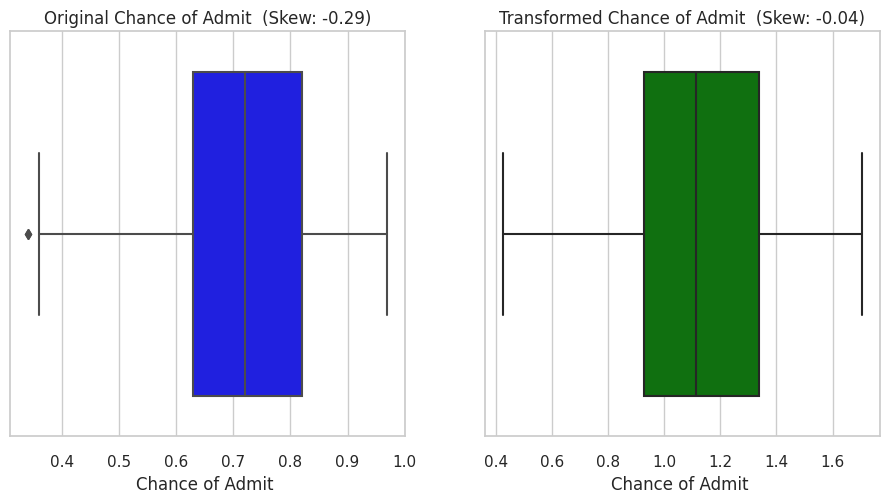

In [ ]:
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the box plots for the original data and transformed data
for col in cols_to_transform:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Original {col} (Skew: {df[col].skew():.2f})')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=transformed_df[col], color='green')
    plt.title(f'Transformed {col} (Skew: {transformed_df[col].skew():.2f})')

    plt.show()


Windsorized Skewness:
Serial No.           0.000000
GRE Score           -0.072110
TOEFL Score          0.163204
University Rating    0.090295
SOP                 -0.168964
LOR                 -0.030318
CGPA                 0.055880
Research            -0.242475
Chance of Admit     -0.143885
dtype: float64


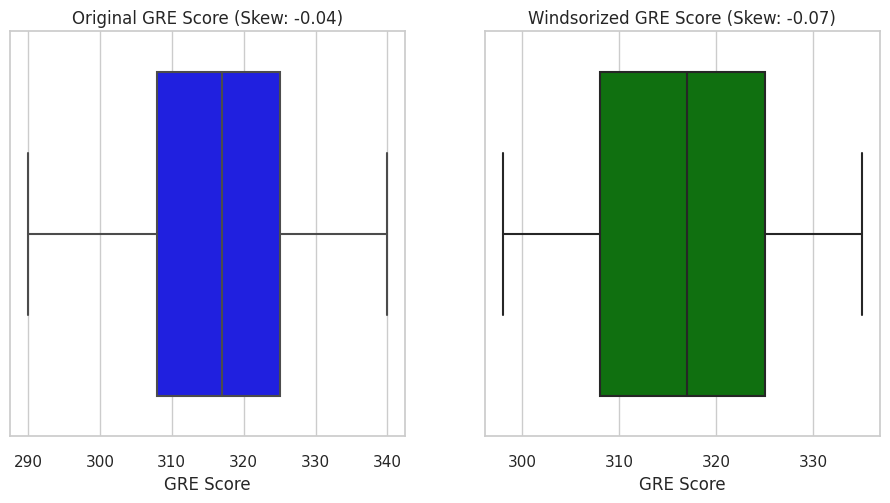

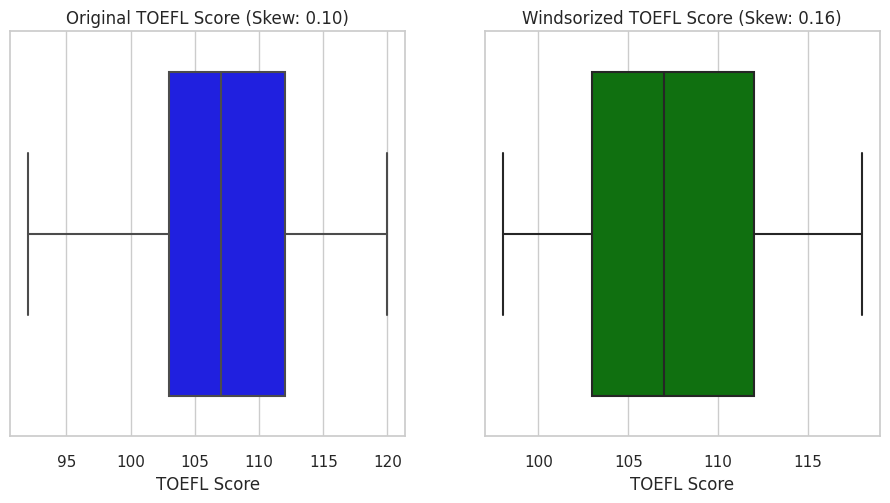

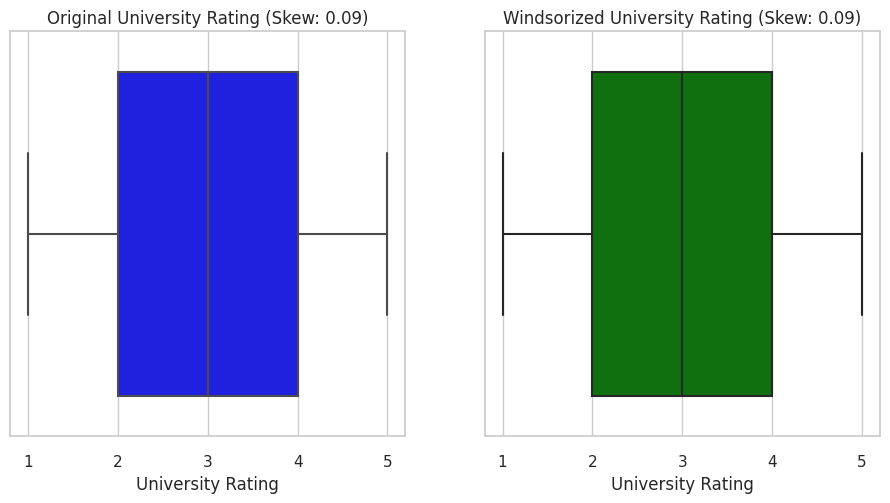

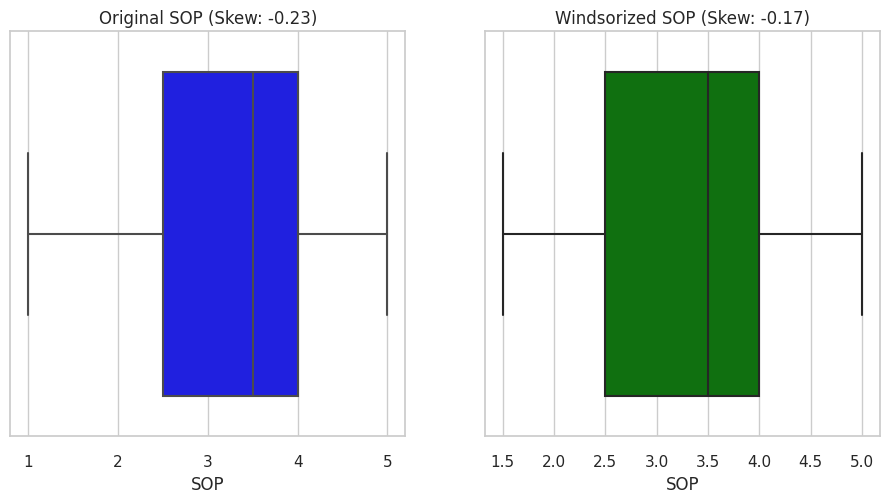

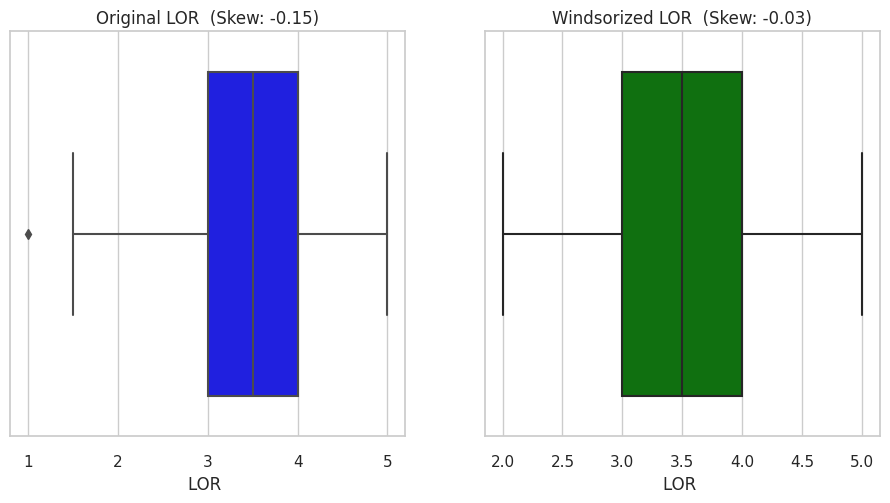

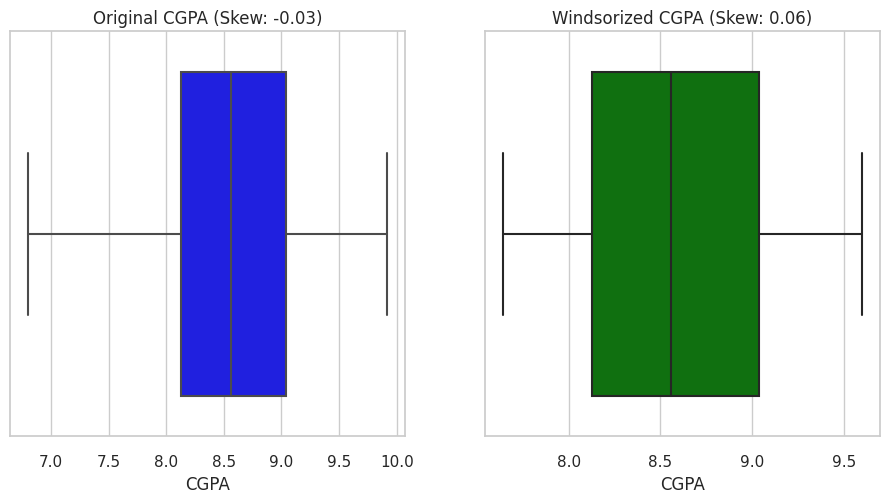

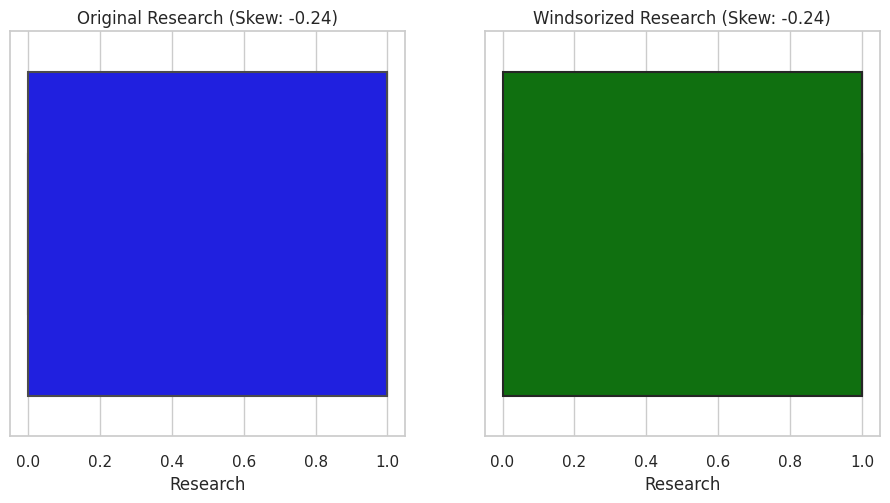

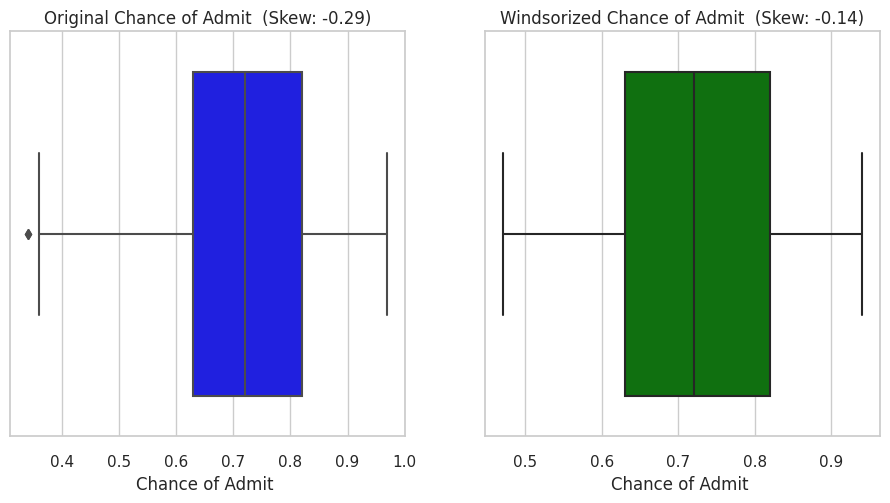

In [ ]:
# Function to Windsorize the data
def windsorize(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)

    windsorized_data = data[column].clip(lower=lower_bound, upper=upper_bound)
    return windsorized_data

# Create a copy of the DataFrame to store Windsorized data
windsorized_df = df.copy()

# Apply Windsorization to each column
for col in cols_to_transform:
    windsorized_df[col] = windsorize(df, col)

# Calculate the skewness of the Windsorized data
windsorized_skewness = windsorized_df.skew()

# Print the skewness values of the Windsorized data
print("Windsorized Skewness:")
print(windsorized_skewness)

# Plot the box plots for the original data and Windsorized data
for col in cols_to_transform:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Original {col} (Skew: {df[col].skew():.2f})')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=windsorized_df[col], color='green')
    plt.title(f'Windsorized {col} (Skew: {windsorized_df[col].skew():.2f})')

    plt.show()

No outliers detected for most of the columns, except for the 'LOR' column which has one outlier. Therefore the data is relatively clean and does not have extreme values that could impact our analysis & model performance.



#**Correlation among variables**



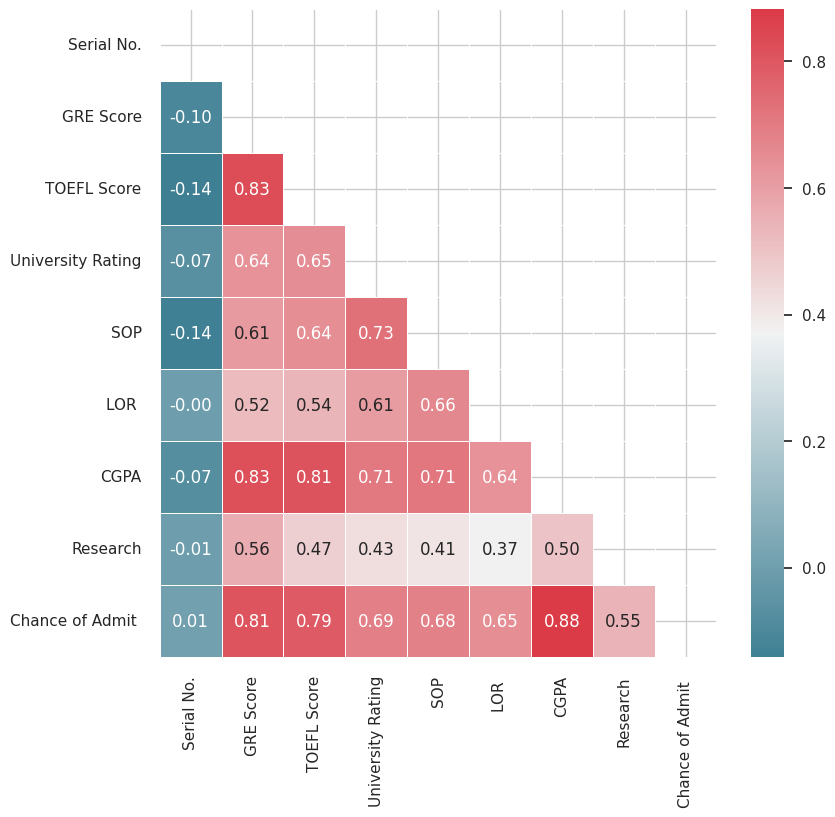

In [ ]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

Let's use different algorithms to see which model performs better...



#**Low Code - PyCaret**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Convert 'Chance of Admit' to a binary outcome (e.g., threshold = 0.75)
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)  # Drop the original 'Chance of Admit' column

##*Confusion Matrix*

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

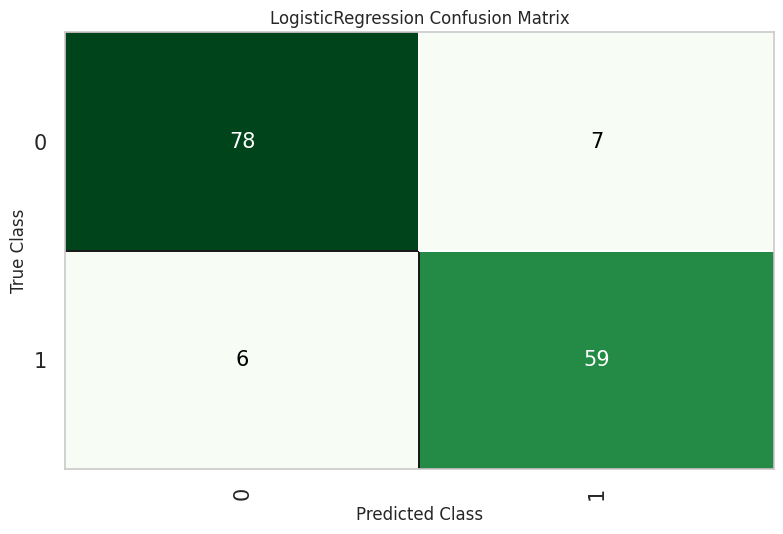

In [ ]:
import pandas as pd
from pycaret.classification import setup, create_model, predict_model, plot_model

# Read in the dataset
#df = pd.read_csv(url)
# Initialize the setup
clf = setup(df, target='Admitted', session_id=42)

# Train the logistic regression model
lr_model = create_model('lr')

# Make predictions on the test set
lr_predictions = predict_model(lr_model)

# Plot the confusion matrix
plot_model(lr_model, plot='confusion_matrix')

##*Accuracy*

In [ ]:
import pandas as pd
from pycaret.classification import setup, create_model, predict_model, plot_model, evaluate_model, pull

# Evaluate the logistic regression model
evaluate_model(lr_model)
accuracy = pull()['Accuracy'][0]
print(f"Accuracy: {accuracy:.2f}")


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Accuracy: 0.91


##*Learning Curve*

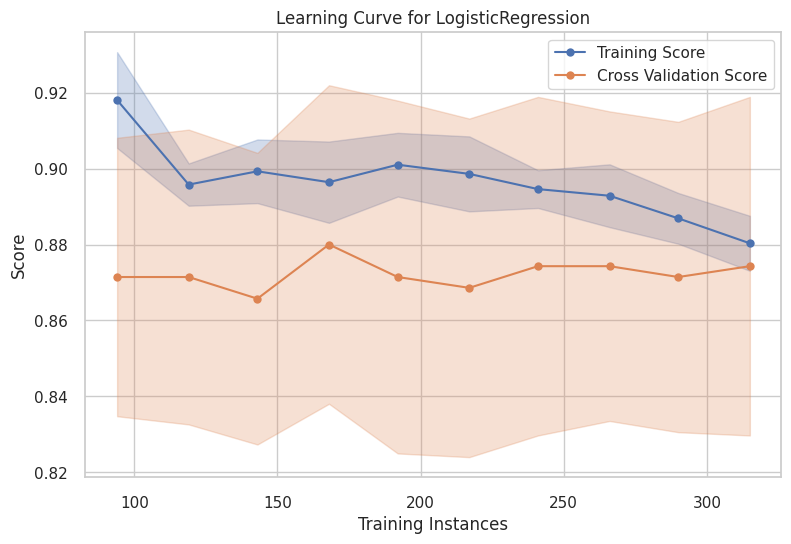

In [ ]:
# Plot the learning curve
plot_model(lr_model, plot='learning')

#**Performance Metrics**

In [ ]:
# Read in the dataset
df = pd.read_csv(url)
# Convert 'Chance of Admit' to a binary outcome (e.g., threshold = 0.75)
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)  # Drop the original 'Chance of Admit' column

# Separate features (X) and target (y)
X = df.drop(columns=['Admitted'])
y = df['Admitted']

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import numpy as np

names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'kNN', 'SVM', 'Decision Tree', 'Multilayer Perceptron', 'Random Forest', 'XGBoost', 'AdaBoost', 'LightGBM']
classifiers = [linear_model.LogisticRegression(), linear_model.SGDClassifier(), linear_model.RidgeClassifier(), linear_model.Perceptron(), KNeighborsClassifier(n_neighbors=5), SVC(kernel='rbf'), DecisionTreeClassifier(), MLPClassifier(hidden_layer_sizes=(25, 25, 1), max_iter=1000, activation='relu', solver='adam'), RandomForestClassifier(criterion='gini'), XGBClassifier(objective='binary:logistic'), AdaBoostClassifier(), lgb.LGBMClassifier(objective='binary')]

for name, clf in zip(names, classifiers):
    print('CLASSIFIER: ', name)
    pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('normalize', MinMaxScaler()), ('model', clf)])
    model = TransformedTargetRegressor(regressor=pipe, transformer=MinMaxScaler())
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score_mean = np.mean(scores)
    score_stdev = np.std(scores)
    print('Mean (std Dev) of AUC: %.3f (%.3f)\n' % (score_mean, score_stdev))

CLASSIFIER:  Linear Regression
Mean (std Dev) of AUC: 0.861 (0.052)

CLASSIFIER:  Lasso Regression
Mean (std Dev) of AUC: 0.866 (0.063)

CLASSIFIER:  Ridge Regression
Mean (std Dev) of AUC: 0.874 (0.056)

CLASSIFIER:  ElasticNet Regression
Mean (std Dev) of AUC: 0.856 (0.054)

CLASSIFIER:  kNN
Mean (std Dev) of AUC: 0.855 (0.048)

CLASSIFIER:  SVM
Mean (std Dev) of AUC: 0.870 (0.045)

CLASSIFIER:  Decision Tree
Mean (std Dev) of AUC: 0.840 (0.064)

CLASSIFIER:  Multilayer Perceptron
Mean (std Dev) of AUC: 0.722 (0.186)

CLASSIFIER:  Random Forest
Mean (std Dev) of AUC: 0.876 (0.062)

CLASSIFIER:  XGBoost
Mean (std Dev) of AUC: 0.869 (0.054)

CLASSIFIER:  AdaBoost
Mean (std Dev) of AUC: 0.893 (0.055)

CLASSIFIER:  LightGBM
Mean (std Dev) of AUC: 0.886 (0.056)



A model as simple as Linear Regression performs the best in this case, which suggests that complicated models doesnt always result in better results. There are situations when simple models are much better suited

#**Random Forest**

##*Grid Search*

In [ ]:
# Read in the dataset
df = pd.read_csv(url)
import pandas as pd
from sklearn.model_selection import train_test_split

target_column = 'Chance of Admit '

# Create the feature matrix 'X' and target variable 'y'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data has been split into train and test sets.")


Data has been split into train and test sets.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
classifier = RandomForestRegressor()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [400],
    'max_depth': [7, 9]
}

# Perform grid search
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best results
print(f"Best: {grid_result.best_score_:0.6f} using {grid_result.best_params_}")

# Print all results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:0.6f} ({stdev:0.6f}) with: {param}")

# Calculate feature importance
classifier = RandomForestRegressor(**grid_result.best_params_)
classifier.fit(X_train, y_train)
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best: 0.808833 using {'max_depth': 9, 'n_estimators': 400}
0.806278 (0.043943) with: {'max_depth': 7, 'n_estimators': 400}
0.808833 (0.047360) with: {'max_depth': 9, 'n_estimators': 400}


##*Confusion Matrix*

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Confusion Matrix:
 [[57  7]
 [ 3 33]]
Accuracy: 0.90


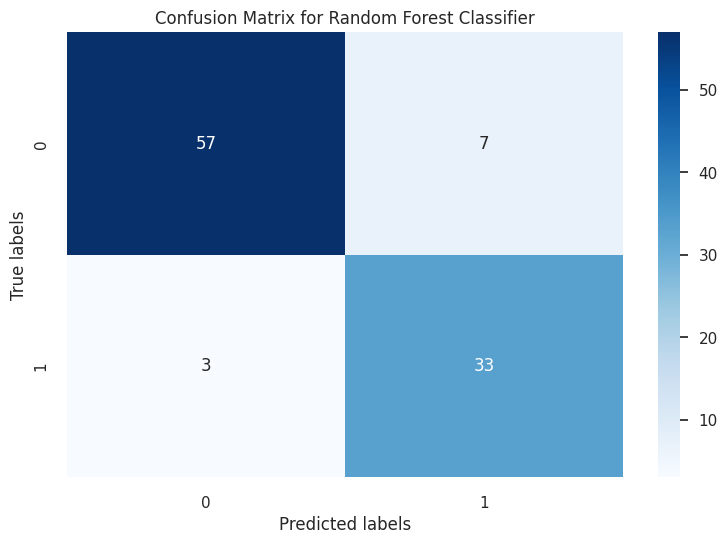

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Read in the dataset
df = pd.read_csv(url)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


# Convert 'Chance of Admit' to a binary outcome (e.g., threshold = 0.75)
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)  # Drop the original 'Chance of Admit' column

# Separate features (X) and target (y)
X = df.drop(columns=['Admitted'])
y = df['Admitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute the confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}".format(acc))

# Plot the confusion matrix using seaborn
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")

# Add labels and title
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

##*Generate Feature Importances*

In [ ]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

##*Visualize Feature Importances*

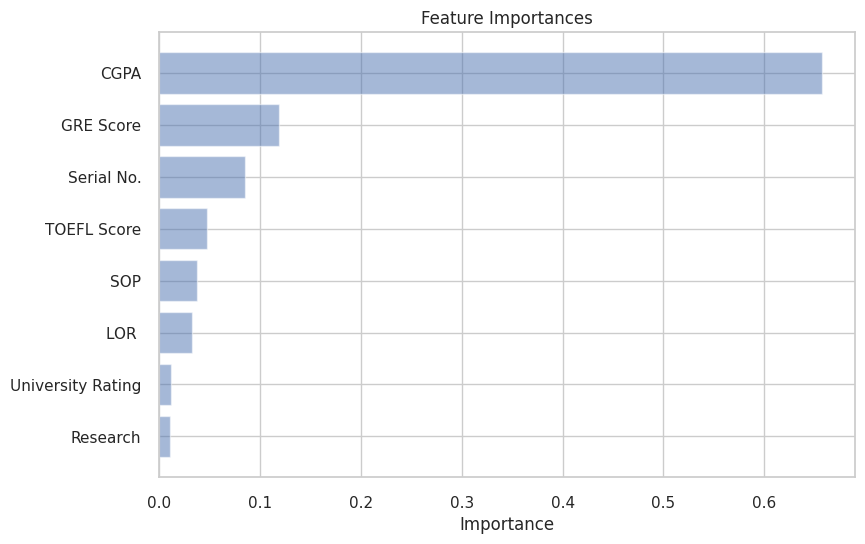

In [ ]:
plt.barh(range(1, len(importance_frame) + 1), importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks(range(1, len(importance_frame) + 1), importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


CGPA is the mostimportant factor for graduate admissions followed by GRE Score.

##*Cross Validation*

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# Create a RandomForestRegressor with the best parameters obtained from the GridSearch
best_params = grid_result.best_params_
classifier = RandomForestRegressor(**best_params)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5)

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.31952276 0.49224455 0.63085642 0.58342142 0.71477696]
Mean cross-validation score: 0.5481644242460094


##*Learning Curve*

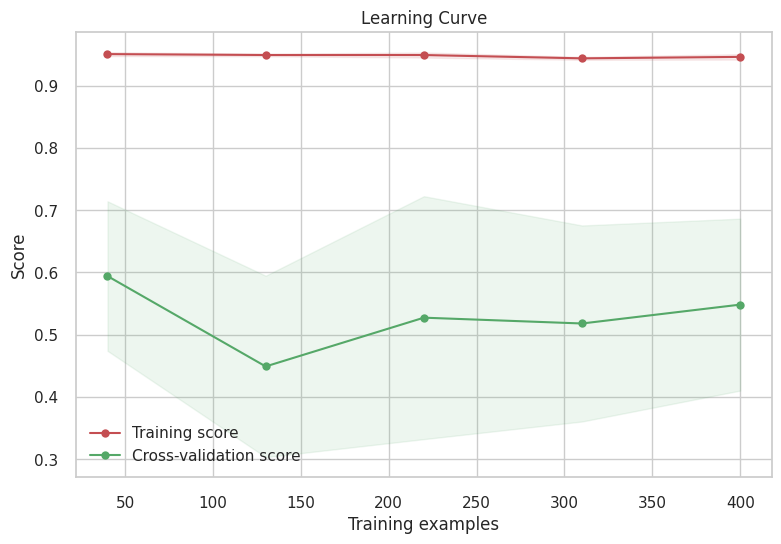

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Create a RandomForestRegressor with the best parameters obtained from the GridSearch
best_params = grid_result.best_params_
classifier = RandomForestRegressor(**best_params)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5)

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#**Linear Regression(Our Best Model)**



##*Grid Search and Hyperparameters*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = Ridge()

# Define the hyperparameters to be tuned
param_grid = {
    'alpha': [0.1, 1, 10, 100],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best results
print(f"Best: {grid_result.best_score_:0.6f} using {grid_result.best_params_}")

# Print all results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:0.6f} ({stdev:0.6f}) with: {param}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best: 0.587899 using {'alpha': 1}
0.587565 (0.051822) with: {'alpha': 0.1}
0.587899 (0.052782) with: {'alpha': 1}
0.587546 (0.057886) with: {'alpha': 10}
0.573895 (0.060997) with: {'alpha': 100}


In [ ]:
# Read in the dataset
df = pd.read_csv(url)
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Convert 'Chance of Admit' to a binary outcome (e.g., threshold = 0.75)
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)  # Drop the original 'Chance of Admit' column

# Separate features (X) and target (y)
X = df.drop(columns=['Admitted'])
y = df['Admitted']

# Create a pipeline with logistic regression
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('normalize', MinMaxScaler()),
    ('model', LogisticRegression())
])

# Define the hyperparameters grid
param_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 500, 1000],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters:  {'model__C': 10, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best Score:  0.9618189281982383


##*Confusion Matrix*

Confusion Matrix:
 [[52 12]
 [ 3 33]]
Accuracy: 0.85


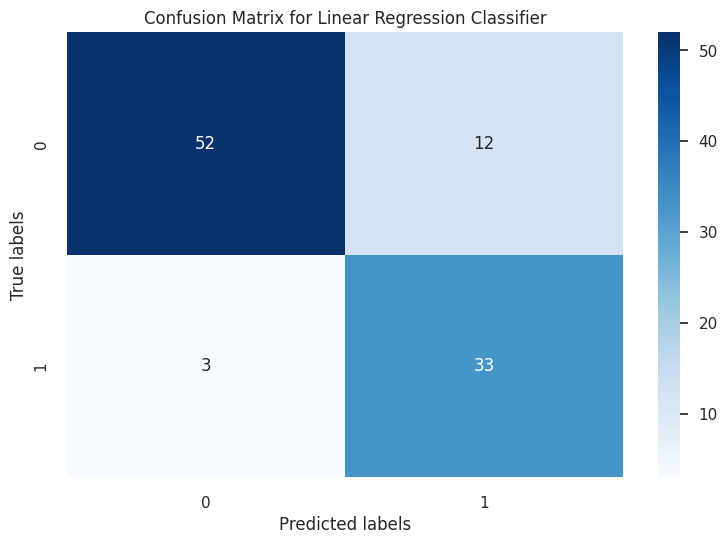

In [ ]:
# Read in the dataset
df = pd.read_csv(url)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Chance of Admit' to a binary outcome (e.g., threshold = 0.75)
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)
df.drop(columns=['Chance of Admit '], inplace=True)  # Drop the original 'Chance of Admit' column

# Separate features (X) and target (y)
X = df.drop(columns=['Admitted'])
y = df['Admitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Compute the confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}".format(acc))

# Plot the confusion matrix using seaborn
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")

# Add labels and title
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Linear Regression Classifier")
plt.show()

##*Generate Feature Importance*

In [ ]:
# Read in the dataset
df = pd.read_csv(url)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Separate input features (X) and target variable (y)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_scaled, y)

# Get feature importance (coefficients)
feature_importance = lr.coef_

# Display feature importance
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Optionally, you can create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

Serial No.: 0.012528630164898708
GRE Score: 0.021683882593205972
TOEFL Score: 0.019398524984494826
University Rating: 0.006073314808444688
SOP: 0.004520456004854248
LOR : 0.013789397843098777
CGPA: 0.06981990027189376
Research: 0.011181318291272306
             Feature  Importance
6               CGPA    0.069820
1          GRE Score    0.021684
2        TOEFL Score    0.019399
5               LOR     0.013789
0         Serial No.    0.012529
7           Research    0.011181
3  University Rating    0.006073
4                SOP    0.004520


##*Visualize Feature Importances*

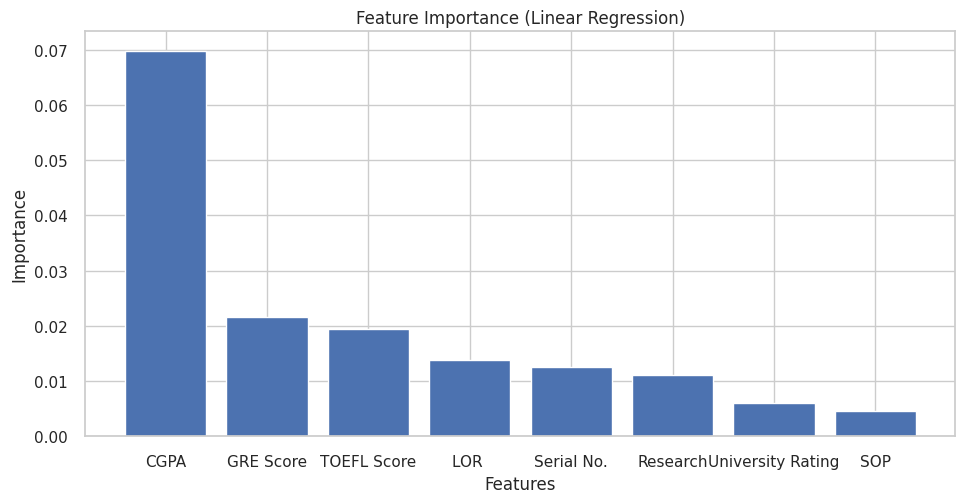

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Linear Regression)')
plt.show()

Clearly, CGPA is the most factor for graduate admissions followed by GRE Score even in Linear Regression Model

##*Partial Dependence Plots*

In [ ]:
!pip install pycebox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


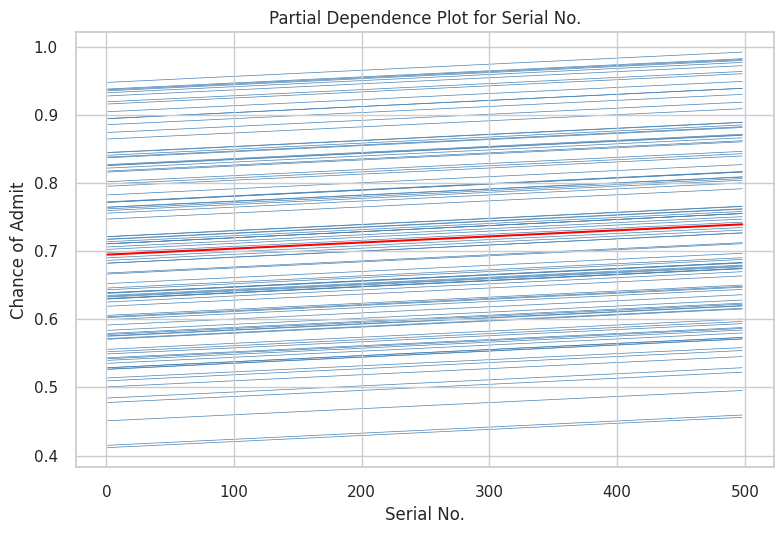

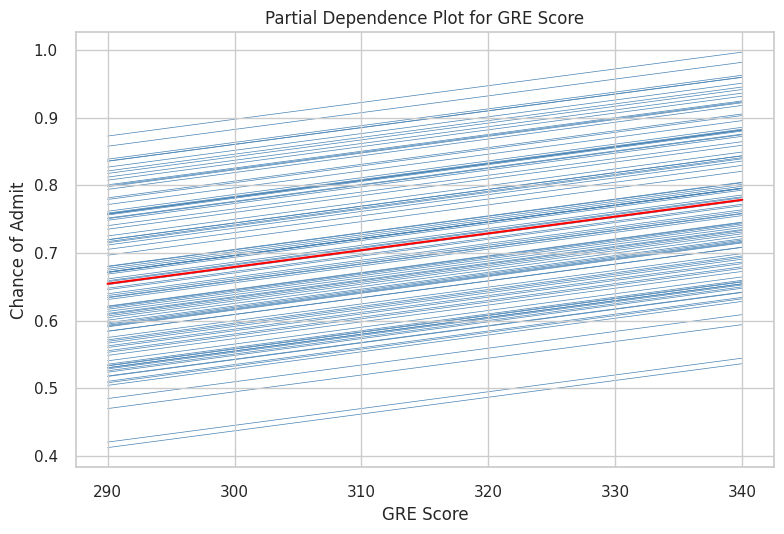

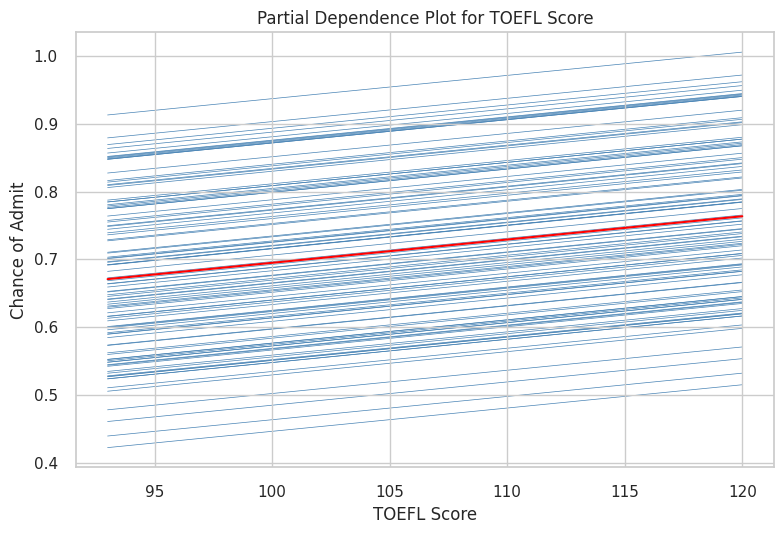

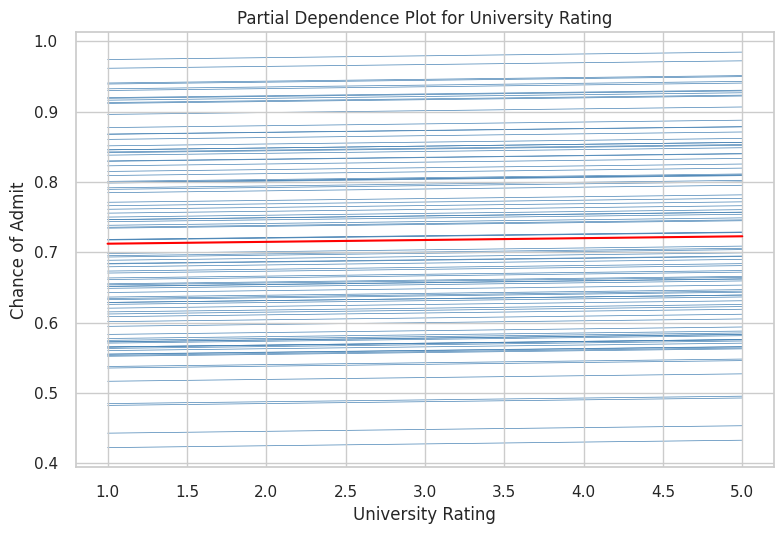

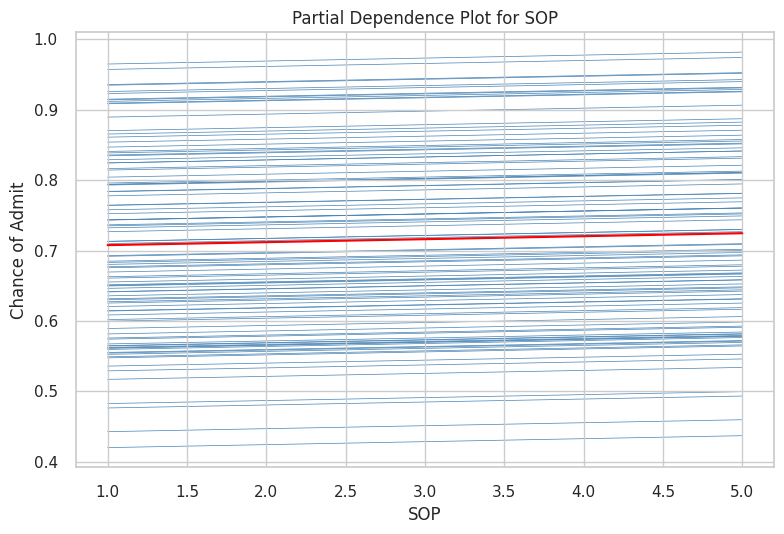

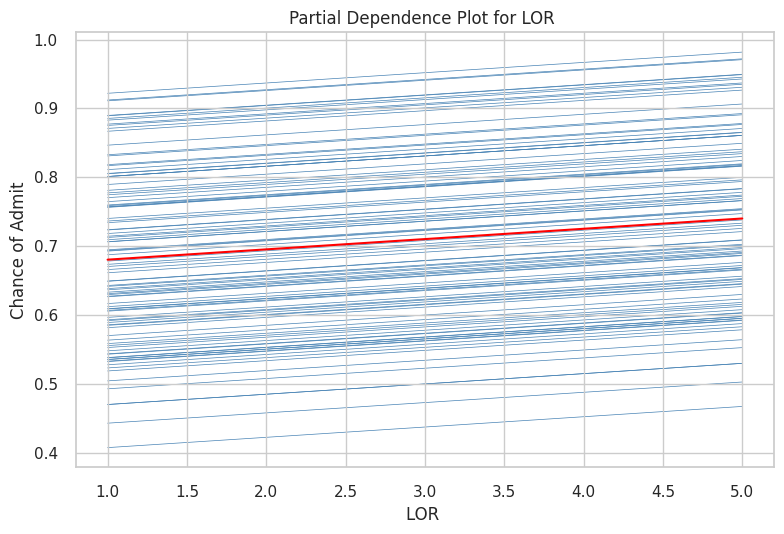

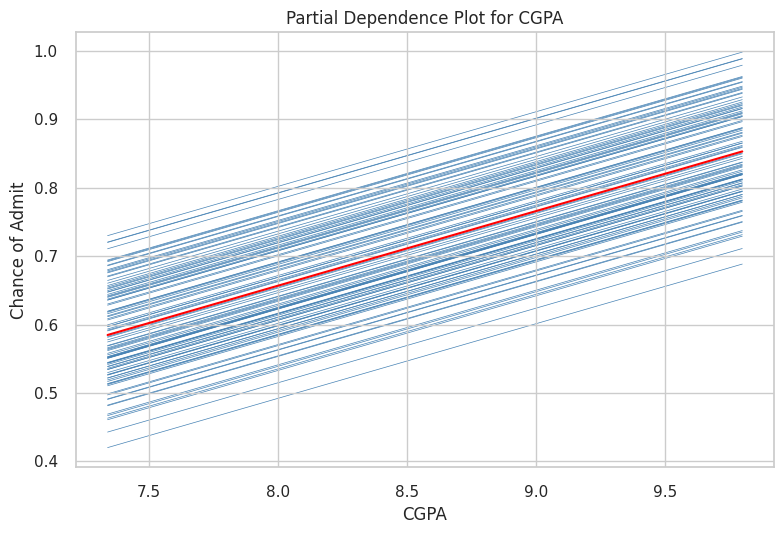

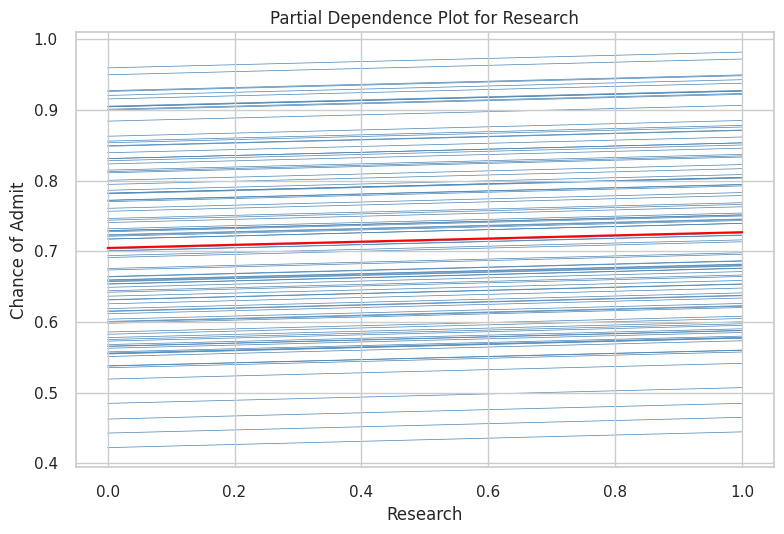

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pycebox.ice import ice, ice_plot

# Prepare the data
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate partial dependence plots
feature_names = X.columns
for feature_name in feature_names:
    ice_data = ice(X_test, feature_name, lr.predict)
    ice_plot(ice_data, c='steelblue', linewidth=0.5, plot_pdp=True, pdp_kwargs={'c': 'red'})
    plt.title(f'Partial Dependence Plot for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Chance of Admit')
    plt.tight_layout()
    display(plt.gcf())
    plt.close()



##*SHAP values*

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


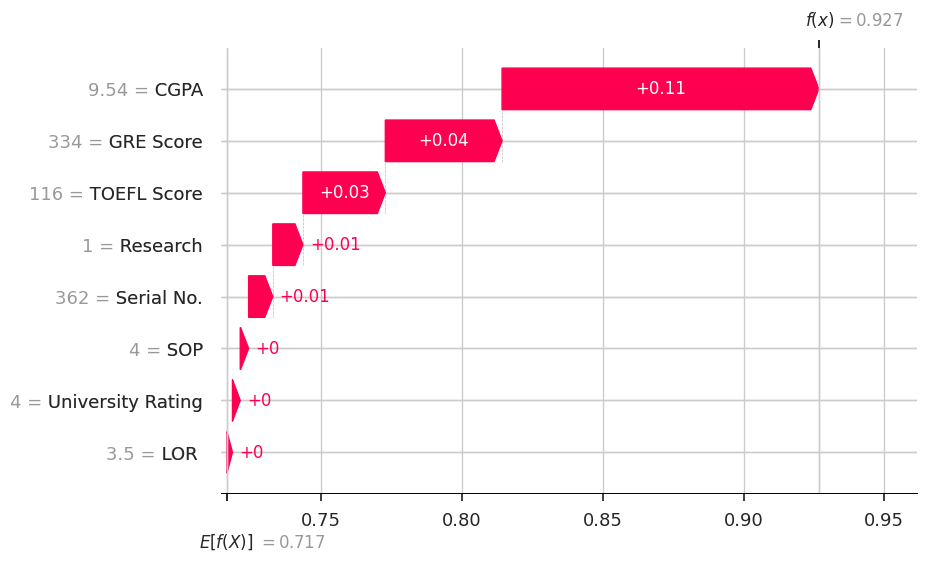

In [ ]:
import shap
import matplotlib.pyplot as plt

# Prepare the SHAP explainer
explainer = shap.Explainer(lr, X_train)

# Calculate SHAP values for a specific instance (e.g., the first instance in the test set)
shap_values = explainer(X_test)

# Set the figure size and spacing between bars
plt.figure(figsize=(10, 6))
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5

# Plot the SHAP waterfall plot for the specific instance (e.g., the first instance in the test set)
shap.plots.waterfall(shap_values[0], max_display=10)
#plt.title('SHAP Waterfall Plot')
#plt.tight_layout()
#display(plt.gcf())
plt.show()

##*Permutation Feature Importance*

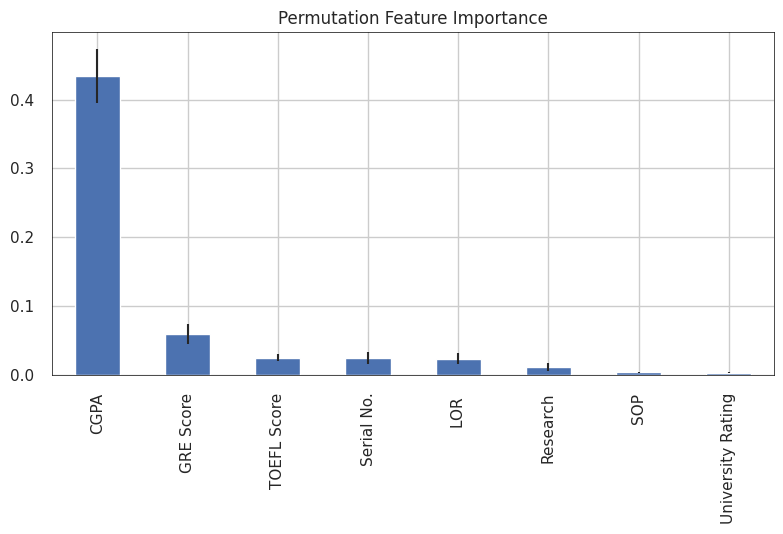

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Calculate permutation feature importances
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)

# Plot the feature importances
importance_df = pd.DataFrame({'importance_mean': result.importances_mean, 'importance_std': result.importances_std}, index=X.columns)
importance_df.sort_values('importance_mean', ascending=False).plot.bar(y='importance_mean', yerr='importance_std', legend=False, title='Permutation Feature Importance')

plt.tight_layout()
display(plt.gcf())
plt.close()

##*Cross Validation*

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.67137972 0.7725973  0.86084156 0.83093238 0.81542346]
Mean cross-validation score: 0.7902348853116391


##*Learning Curve*

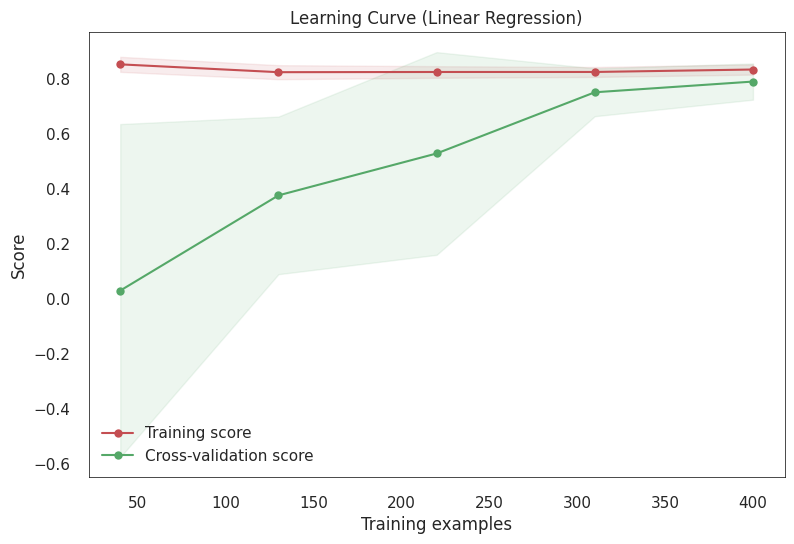

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Create a Linear Regression model
model = LinearRegression()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Compute mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (Linear Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#**Cross Validation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
}

# Number of cross-validation folds
cv_folds = 5

# Custom scorer function for calculating the root mean squared error
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=cv_folds, scoring=rmse_scorer)
    mean_cv_score = np.mean(-cv_scores)
    print(f"{model_name} - Mean RMSE: {mean_cv_score} (using {cv_folds}-fold cross-validation)")


RandomForestRegressor - Mean RMSE: 0.058379573487102356 (using 5-fold cross-validation)
LinearRegression - Mean RMSE: 0.06293946081476316 (using 5-fold cross-validation)


#Conclusion

##Best model
Linear regression

##Why:
- Converging (close) learning curves; suggests  well-performing model with  good bias/variance balance
- Achieved 0.9618 accuracy by outperforming all other combinations of hyperparameters
- Higher mean cross-validation score of 0.79 represents average performance of model across all subsets, indicating how well it generalizes to unseen data

##Final recommendations
Prospective students should focus efforts on CGPA in the future; Feature importance showed it’s most critical factor for graduate admissions
